In [1]:
import pandas as pd

In [2]:
resdf = pd.read_table('../examples/fsx1/result.m8', header = None)

In [3]:
print(resdf)

                                                   0                      1   \
0       prots_8_WP_007110832.1_assembly.593500_52.pdb  AF-Q6D2F3-F1-model_v4   
1       prots_8_WP_007110832.1_assembly.593500_52.pdb  AF-B1JJ32-F1-model_v4   
2       prots_8_WP_007110832.1_assembly.593500_52.pdb  AF-A4TIM6-F1-model_v4   
3       prots_8_WP_007110832.1_assembly.593500_52.pdb  AF-A7FHH6-F1-model_v4   
4       prots_8_WP_007110832.1_assembly.593500_52.pdb  AF-Q5XIZ9-F1-model_v4   
...                                               ...                    ...   
152217  prots_8_WP_007110832.1_assembly.593500_18.pdb  AF-Q6H434-F1-model_v4   
152218  prots_8_WP_007110832.1_assembly.593500_18.pdb  AF-P46974-F1-model_v4   
152219  prots_8_WP_007110832.1_assembly.593500_18.pdb  AF-Q08201-F1-model_v4   
152220  prots_8_WP_007110832.1_assembly.593500_18.pdb  AF-P23174-F1-model_v4   
152221  prots_8_WP_007110832.1_assembly.593500_18.pdb  AF-Q4WSI1-F1-model_v4   

           2    3    4   5   6    7    

In [4]:
resdf = resdf[resdf[10]< 10**-3]
resdf['uniprot_id'] = resdf[1].map( lambda x: x.split('-')[1])
print(resdf)

                                                     0                      1  \
175     prots_0_WP_174701778.1_assembly.1860500_42.pdb  AF-Q58793-F1-model_v4   
178     prots_0_WP_174701778.1_assembly.1860500_42.pdb  AF-O94553-F1-model_v4   
182     prots_0_WP_174701778.1_assembly.1860500_42.pdb  AF-P55266-F1-model_v4   
183     prots_0_WP_174701778.1_assembly.1860500_42.pdb  AF-P76066-F1-model_v4   
185     prots_0_WP_174701778.1_assembly.1860500_42.pdb  AF-Q99MU3-F1-model_v4   
...                                                ...                    ...   
151850   prots_8_WP_007110832.1_assembly.593500_56.pdb  AF-Q2YWB1-F1-model_v4   
151851   prots_8_WP_007110832.1_assembly.593500_56.pdb  AF-Q2FV74-F1-model_v4   
151852   prots_8_WP_007110832.1_assembly.593500_56.pdb  AF-Q99R88-F1-model_v4   
151853   prots_8_WP_007110832.1_assembly.593500_56.pdb  AF-Q6G6C6-F1-model_v4   
151854   prots_8_WP_007110832.1_assembly.593500_56.pdb  AF-Q7A3F4-F1-model_v4   

            2    3    4  5 

204
{'prots_0_WP_174701778.1_assembly.1860500_42.pdb': 0, 'prots_ELY83688.1_assembly.213000_58.pdb': 1, 'prots_0_WP_179268568.1_assembly.2078500_129.pdb': 2, 'prots_0_WP_179268568.1_assembly.2078500_29.pdb': 3, 'prots_8_WP_007110832.1_assembly.593500_68.pdb': 4, 'prots_WP_058826362.1_assembly.93069_4.pdb': 5, 'prots_0_ELY83688.1_assembly.213000_17.pdb': 6, 'prots_8_WP_007110832.1_assembly.593500_63.pdb': 7, 'prots_0_WP_174701778.1_assembly.1860500_4.pdb': 8, 'prots_0_WP_179268568.1_assembly.2078500_83.pdb': 9, 'prots_0_ELY83688.1_assembly.213000_80.pdb': 10, 'prots_0_WP_179268568.1_assembly.2078500_126.pdb': 11, 'prots_WP_174701778.1_assembly.1860500_14.pdb': 12, 'prots_0_WP_179268568.1_assembly.2078500_10.pdb': 13, 'prots_0_AJF63093.1_assembly.780500_8.pdb': 14, 'prots_0_ELY83688.1_assembly.213000_40.pdb': 15, 'prots_WP_174701778.1_assembly.1860500_53.pdb': 16, 'prots_0_ELY83688.1_assembly.213000_2.pdb': 17, 'prots_8_WP_007110832.1_assembly.593500_19.pdb': 18, 'prots_0_WP_174701778.1_

/home/cactuskid/miniconda3/envs/ML2/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/cactuskid/miniconda3/envs/ML2/lib/python3.10/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


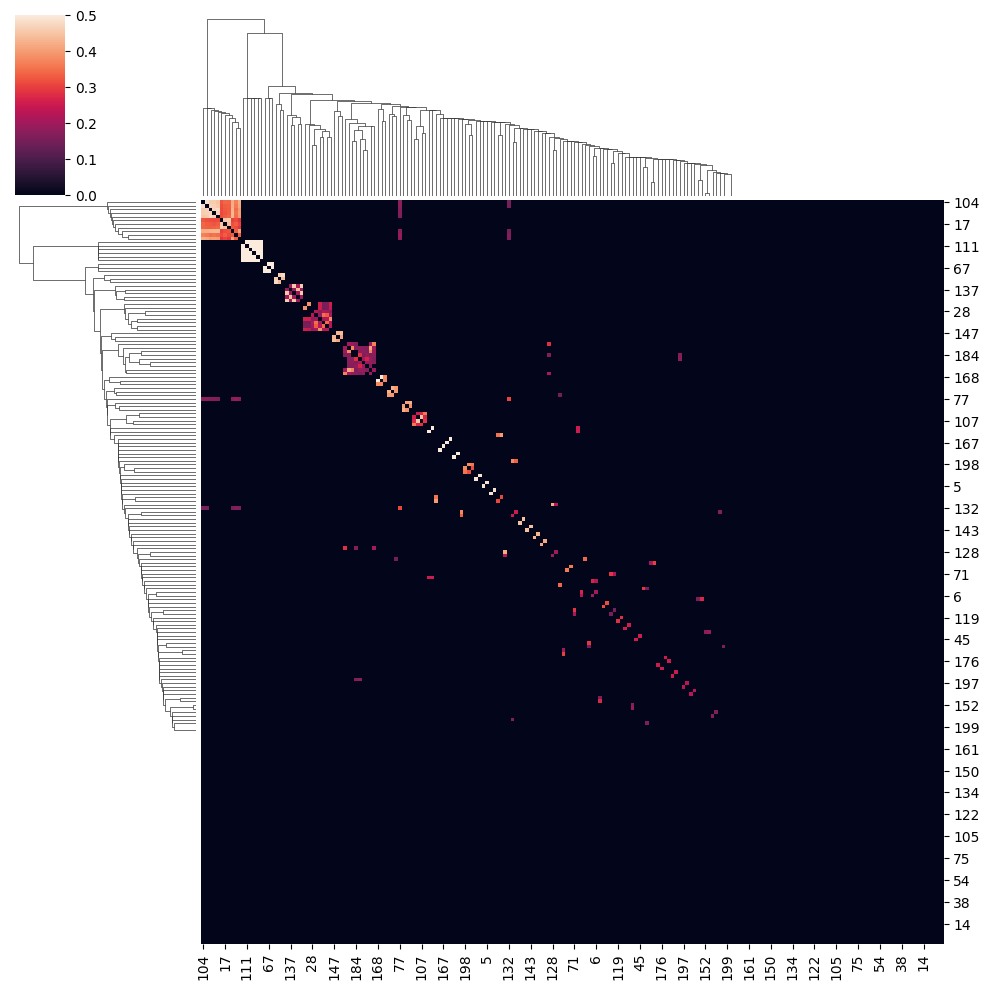

In [5]:
#build a set for each query and perform a jaccard clustering of the queries
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
qsets = {}
for q in resdf[0].unique():
    sub= resdf[resdf[0]==q]
    qsets[q] = set(sub[1])
print(len(qsets))
#use jaccard between sets
qindex = {q:i for i,q in enumerate(qsets)}
distmat = np.zeros((len(qindex),len(qindex)))
print(qindex)
for i,q1 in enumerate(qsets):
    for j,q2 in enumerate(qsets):
        if i > j:
            distmat[qindex[q1], qindex[q2]] = len(qsets[q1].intersection(qsets[q2])) / len(qsets[q1].union(qsets[q2]))


#select clusters for treebuilding
distmat += distmat.T
distmat /= 2

#thresh jaccard
distmat[distmat< .15] = 0
sns.clustermap(distmat)
plt.show()


1 ['prots_ELY83688.1_assembly.213000_58.pdb'
 'prots_8_WP_007110832.1_assembly.593500_19.pdb'
 'prots_0_ELY83688.1_assembly.213000_58.pdb']
4 ['prots_8_WP_007110832.1_assembly.593500_68.pdb'
 'prots_0_ELY83688.1_assembly.213000_17.pdb'
 'prots_ELY83688.1_assembly.213000_17.pdb']
5 ['prots_WP_058826362.1_assembly.93069_4.pdb'
 'prots_0_WP_058826362.1_assembly.93069_4.pdb']
6 ['prots_8_WP_007110832.1_assembly.593500_63.pdb'
 'prots_0_ELY83688.1_assembly.213000_12.pdb'
 'prots_WP_174701778.1_assembly.1860500_8.pdb'
 'prots_0_WP_174701778.1_assembly.1860500_8.pdb'
 'prots_0_WP_179268568.1_assembly.2078500_36.pdb'
 'prots_ELY83688.1_assembly.213000_12.pdb']
7 ['prots_0_WP_174701778.1_assembly.1860500_4.pdb'
 'prots_WP_174701778.1_assembly.1860500_4.pdb']
9 ['prots_0_ELY83688.1_assembly.213000_80.pdb'
 'prots_ELY83688.1_assembly.213000_80.pdb'
 'prots_8_WP_007110832.1_assembly.593500_41.pdb']
11 ['prots_WP_174701778.1_assembly.1860500_14.pdb'
 'prots_4_WP_163487151.1_assembly.2827000_18.pdb'

<Axes: ylabel='Count'>

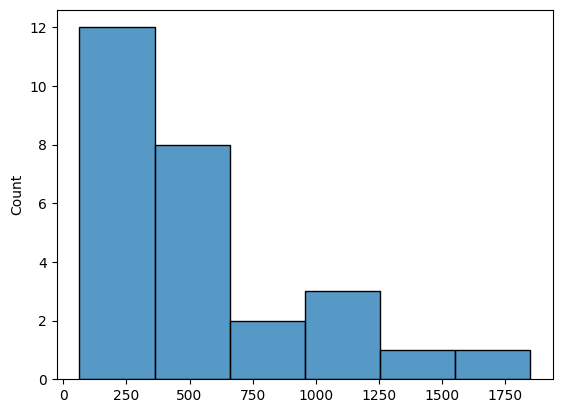

In [6]:
import os

family_folder = '../examples/fsx1/foldtree_searchres/'
#find connected somponents
qindex_rev = dict(zip(qindex.values(), qindex.keys()))
Graph = nx.from_numpy_array(distmat)
if os.path.isdir( family_folder ) == False:
    os.mkdir(family_folder)

famcount = 0
treesizes = []
for i,s in enumerate(nx.connected_components(Graph)):
    if len(s)>1:
        #print(s)
        queries = [qindex_rev[i] for i in s]
        sub=resdf[resdf[0].isin(queries)]
        print(i,sub[0].unique())
        #print(sub, sub[0].unique())
        #output a csv, identifier list in a folder for each fam to setup the snake tree problem
        if len(sub) >100:
            treesizes.append(len(sub.uniprot_id.unique()))
            folder = family_folder + str(famcount) + '/'
            struct_folder = folder + 'structs/'
            if os.path.isdir( folder ) == False: 
                os.mkdir(folder)
            if os.path.isdir( struct_folder ) == False: 
                os.mkdir(struct_folder)
            idlist = ''.join([ i + '\n' for i in sub.uniprot_id])
            with open(folder + 'identifiers.txt' , 'w' ) as idout:
                idout.write(idlist)

            #for filename in sub[0].unique():
            #    with open( './struct_queries/'+filename) as structin:
            #        with open(struct_folder+filename, 'w') as structout:
            #            structout.write(structin.read())
            famcount +=1
        #add models into the structs folder
sns.histplot(treesizes)


In [32]:
#Retrieving tissue specific expression for each of our genes using
#a sparql query for using lists of ensemble IDs on BGEE
from SPARQLWrapper import SPARQLWrapper , CSV
from io import StringIO

endpt = "https://bgee.org/sparql/"
sparql = SPARQLWrapper(endpt)

def Bgee_query(idlist):
    query = '''

    PREFIX orth: <http://purl.org/net/orth#>
    PREFIX genex: <http://purl.org/genex#>
    PREFIX lscr: <http://purl.org/lscr#>
    PREFIX gene: <http://purl.org/net/orth#Gene>
    PREFIX obo: <http://purl.obolibrary.org/obo/>
    SELECT DISTINCT ?anat ?anatName ?geneEns{{
        
        values  ?geneEns {{   {0}   }}
        ?gene genex:isExpressedIn ?anat .
        ?gene lscr:xrefEnsemblGene ?geneEns.
        ?gene rdfs:label ?geneName .
        ?anat rdfs:label ?anatName .
    }}
    '''

    #for each species in our queries
    #make a list of gene IDs
    pre = '<http://rdf.ebi.ac.uk/resource/ensembl/'
    suf = '>'
    ensemblelist = ''.join( [ pre + bgeeid  + suf + ' ' for bgeeid in idlist if type(bgeeid) is str  ] )
    #get the Bgee data
    sparql.setQuery(query.format(ensemblelist))
    sparql.setReturnFormat(CSV)
    results = sparql.query().convert()
    #and make a dataframe for our returned results
    sub = pd.read_csv(StringIO(results.decode()) )
    sub['geneEns'] = sub['geneEns'].map(lambda x : x.split('/')[-1])
    #add which species the data came from to our dataframe columns
    return sub


In [10]:
#run foldtree on each folder and then continue here

import requests
import time

def unirequest_tab(name, verbose = False):
	#we query first by protein name and then gene name
	url = 'http://rest.uniprot.org/uniprotkb/stream?'
	params = [
	'query=accession:{}'.format(name),
	'fields=id,accession,gene_names,protein_name,reviewed,protein_name,organism_name,lineage_ids,sequence,xref_bgee,go,xref_ensembl',
	'format=tsv',
	]
	params = ''.join([ p+'&' for p in params ])[:-1]
	data = requests.get(url+params).text
	#only return the first hit for each query    
	try:
		data =  pd.read_table(StringIO(data))
		data['query'] = data['Entry']
		data = data[ data['Entry'].isin(name.split('+OR+'))]
		if verbose is True:
			
			print(data)
		return data    
	except:
		print('error', data )
		time.sleep(10)
		unirequest_tab(name, verbose = True)
		

def chunk(data,csize):
	return [data[x:x+csize] for x in range(0, len(data), csize)]

def grab_entries(ids, verbose = False):
	print(len(ids))
	name_results = pd.concat([unirequest_tab( '+OR+'.join(c) , verbose = False) for c in chunk(ids, 50 )] , ignore_index= True)
	if verbose == True:
		print(name_results)
	return name_results

dfs = []
for i,s in enumerate(nx.connected_components(Graph)):
	if len(s)>1:
		#print(s)
		queries = [qindex_rev[i] for i in s]
		sub=resdf[resdf[0].isin(queries)]
		#print(sub, sub[0].unique())
		#output a csv, identifier list in a folder for each fam to setup the snake tree problem
		if len(sub) >100:

			treesizes.append(len(sub.uniprot_id.unique()))
			idlist = ''.join([ i + '\n' for i in sub.uniprot_id])
			#grab the uniprot entries
			bgeedf = grab_entries(sub.uniprot_id.unique())
			#grab the bgee entries
			if 'Bgee' in bgeedf.columns:
				bgeedf = bgeedf[bgeedf.Bgee.notnull()]
				bgeedf = bgeedf[bgeedf.Ensembl.notnull()]
				bgeedf = bgeedf[bgeedf.Ensembl.map(lambda x : len(x) > 0)]
				print('done')

				famcount +=1
				bgeedf['fam'] = famcount
				dfs.append(bgeedf)
				print(bgeedf)


alldf = pd.concat(dfs)
print(alldf)

276
done
      Entry Name   Entry                   Gene Names  \
50   S47A1_RABIT  A7KAU2                SLC47A1 MATE1   
52    RFT1_HUMAN  Q96AA3                         RFT1   
90    RFT1_MOUSE  Q8C3B8                         Rft1   
100  S47A1_MOUSE  Q8K0H1                Slc47a1 Mate1   
102   ANKH_HUMAN  Q9HCJ1  ANKH KIAA1581 UNQ241/PRO274   
152  S47A1_HUMAN  Q96FL8                SLC47A1 MATE1   
153   ANKH_MOUSE  Q9JHZ2                     Ankh Ank   
201  S47A2_MOUSE  Q3V050                Slc47a2 Mate2   
202  S47A2_HUMAN  Q86VL8                SLC47A2 MATE2   

                                         Protein names  Reviewed  \
50   Multidrug and toxin extrusion protein 1 (MATE-...  reviewed   
52                                Protein RFT1 homolog  reviewed   
90                                Protein RFT1 homolog  reviewed   
100  Multidrug and toxin extrusion protein 1 (MATE-...  reviewed   
102        Progressive ankylosis protein homolog (ANK)  reviewed   
152  Multidr

In [29]:
#save alldf to a file
print(alldf.Ensembl)
print(alldf.columns)
alldf.Bgee = alldf.Bgee.map(lambda x : x.replace(';', '' ).strip())
print(alldf.Ensembl)
alldf.to_csv('../examples/fsx1/bgee_uniprot.csv')



50       ENSOCUT00000061436
52         ENST000002962928
90     ENSMUST0000006423016
100    ENSMUST0000001026710
102        ENST000002842688
               ...         
52      ENSMUST000000767377
53      ENSRNOT000000075545
54         ENST000003894418
56     ENSMUST0000002333610
59         ENST000002993087
Name: Ensembl, Length: 1615, dtype: object
Index(['Entry Name', 'Entry', 'Gene Names', 'Protein names', 'Reviewed',
       'Protein names.1', 'Organism', 'Taxonomic lineage (Ids)', 'Sequence',
       'Bgee', 'Gene Ontology (GO)', 'Ensembl', 'query', 'fam'],
      dtype='object')
50       ENSOCUT00000061436
52         ENST000002962928
90     ENSMUST0000006423016
100    ENSMUST0000001026710
102        ENST000002842688
               ...         
52      ENSMUST000000767377
53      ENSRNOT000000075545
54         ENST000003894418
56     ENSMUST0000002333610
59         ENST000002993087
Name: Ensembl, Length: 1615, dtype: object


Oryctolagus cuniculus (Rabbit)
Index(['anat', 'anatName', 'geneEns', 'Entry Name', 'Entry', 'Gene Names',
       'Protein names', 'Reviewed', 'Protein names.1', 'Organism',
       'Taxonomic lineage (Ids)', 'Sequence', 'Bgee', 'Gene Ontology (GO)',
       'Ensembl', 'query', 'fam'],
      dtype='object')


/home/cactuskid/miniconda3/envs/ML2/lib/python3.10/site-packages/seaborn/matrix.py:1113: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(**tight_params)


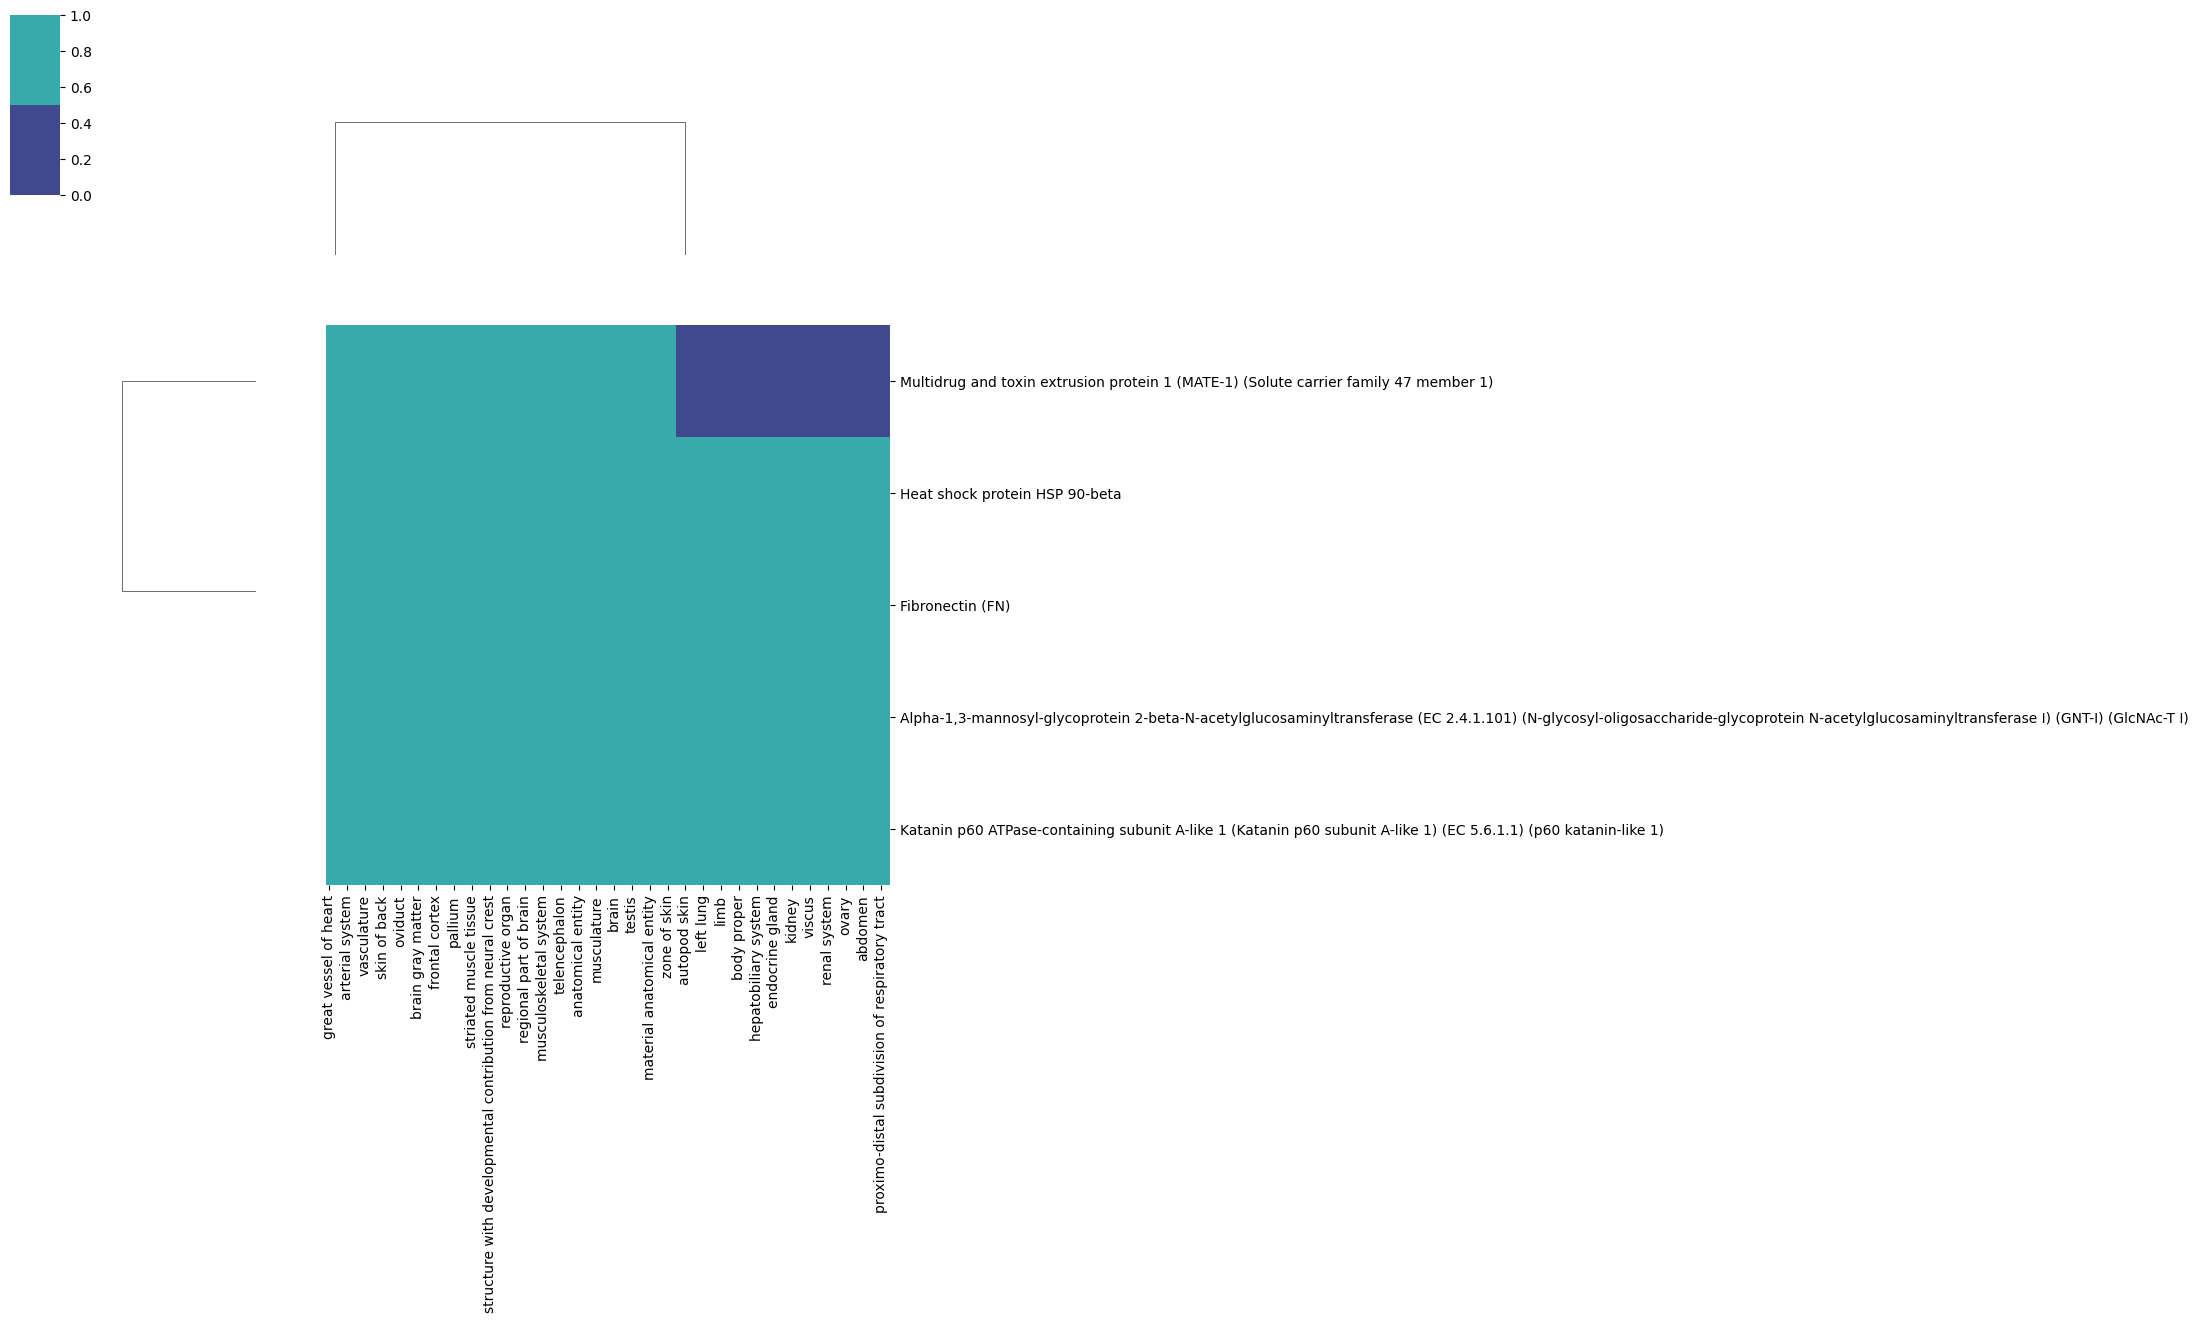

Homo sapiens (Human)
Index(['anat', 'anatName', 'geneEns', 'Entry Name', 'Entry', 'Gene Names',
       'Protein names', 'Reviewed', 'Protein names.1', 'Organism',
       'Taxonomic lineage (Ids)', 'Sequence', 'Bgee', 'Gene Ontology (GO)',
       'Ensembl', 'query', 'fam'],
      dtype='object')


/home/cactuskid/miniconda3/envs/ML2/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/cactuskid/miniconda3/envs/ML2/lib/python3.10/site-packages/seaborn/matrix.py:1113: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(**tight_params)


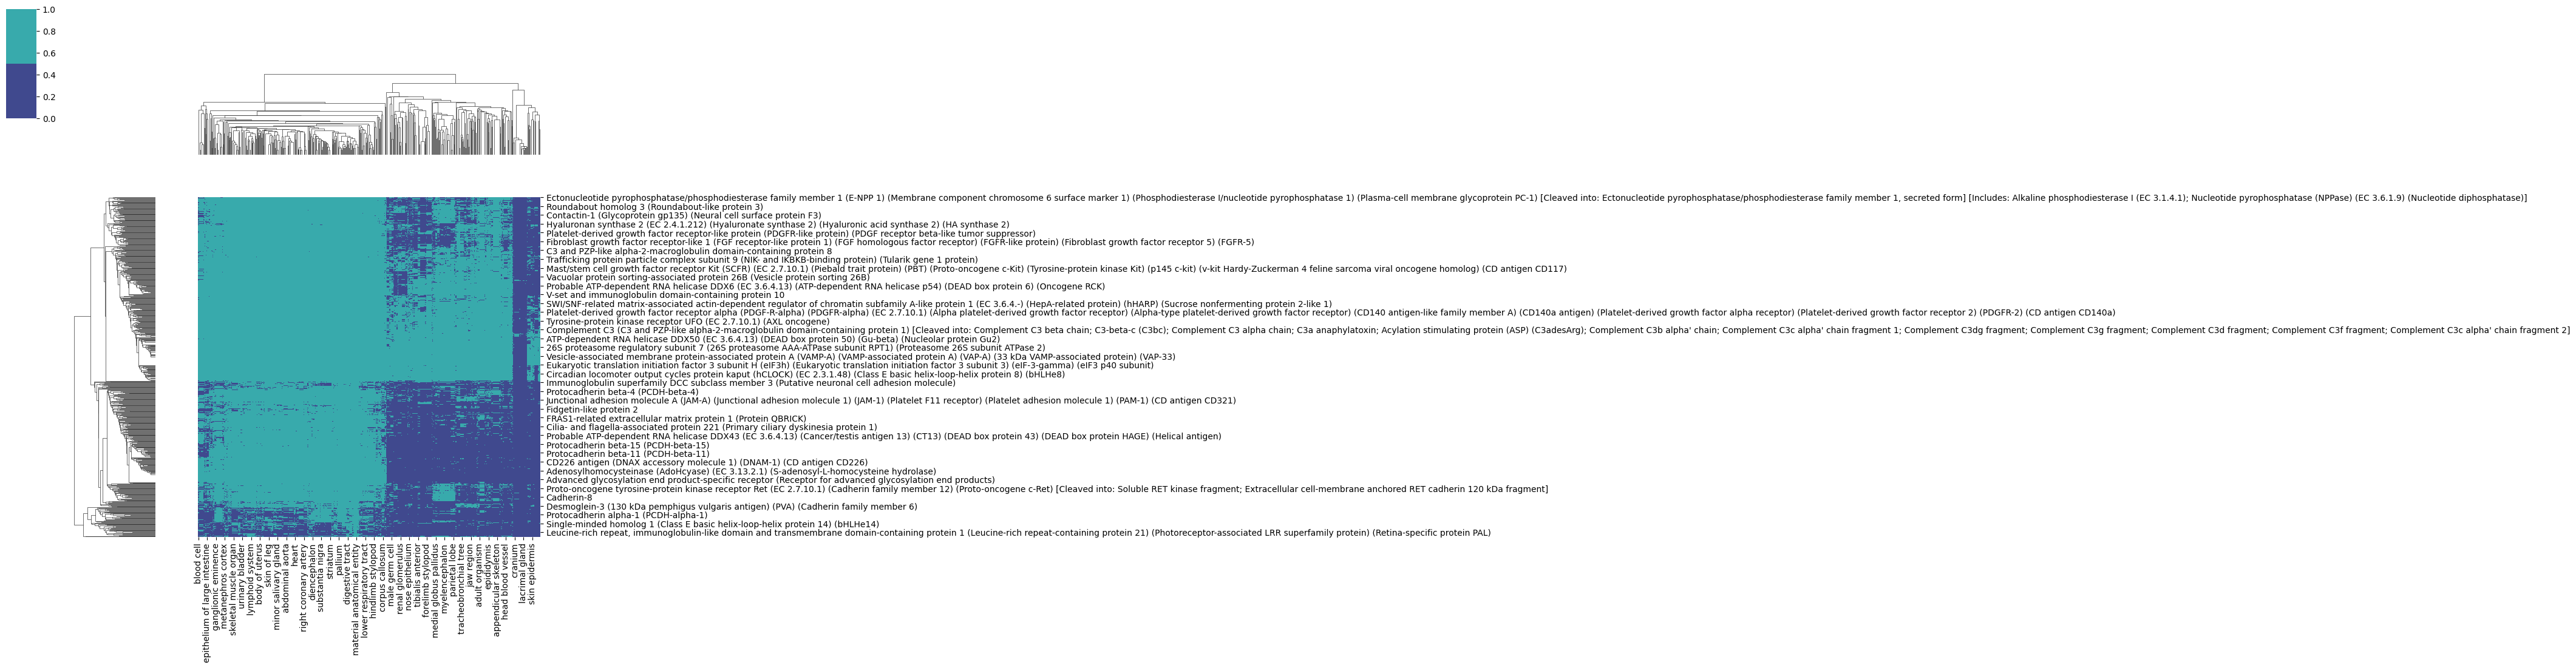

Mus musculus (Mouse)
Index(['anat', 'anatName', 'geneEns', 'Entry Name', 'Entry', 'Gene Names',
       'Protein names', 'Reviewed', 'Protein names.1', 'Organism',
       'Taxonomic lineage (Ids)', 'Sequence', 'Bgee', 'Gene Ontology (GO)',
       'Ensembl', 'query', 'fam'],
      dtype='object')


/home/cactuskid/miniconda3/envs/ML2/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/cactuskid/miniconda3/envs/ML2/lib/python3.10/site-packages/seaborn/matrix.py:1113: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(**tight_params)


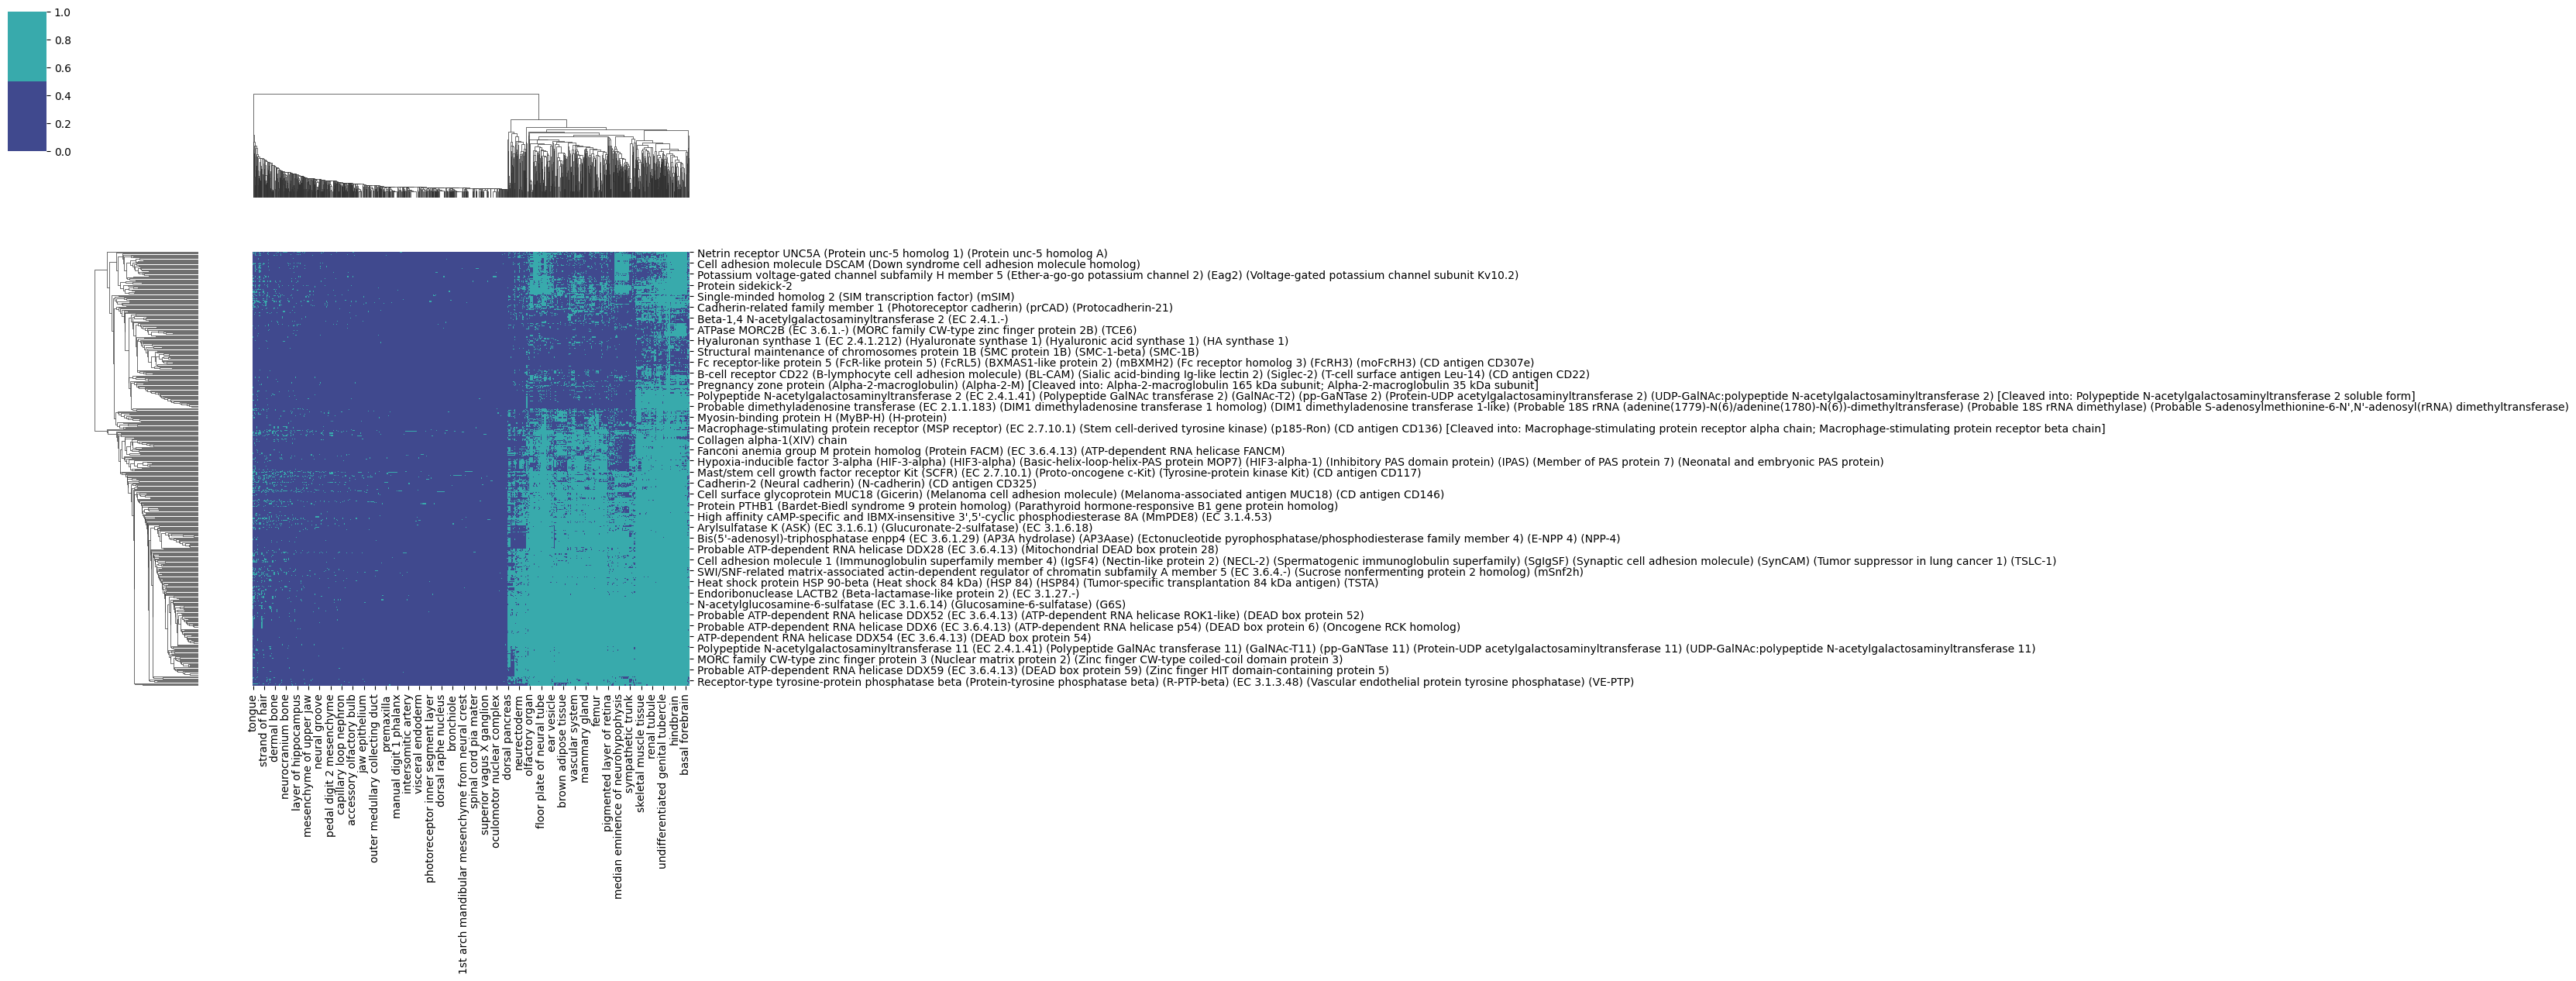

Rattus norvegicus (Rat)
Index(['anat', 'anatName', 'geneEns', 'Entry Name', 'Entry', 'Gene Names',
       'Protein names', 'Reviewed', 'Protein names.1', 'Organism',
       'Taxonomic lineage (Ids)', 'Sequence', 'Bgee', 'Gene Ontology (GO)',
       'Ensembl', 'query', 'fam'],
      dtype='object')


/home/cactuskid/miniconda3/envs/ML2/lib/python3.10/site-packages/seaborn/matrix.py:1113: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(**tight_params)


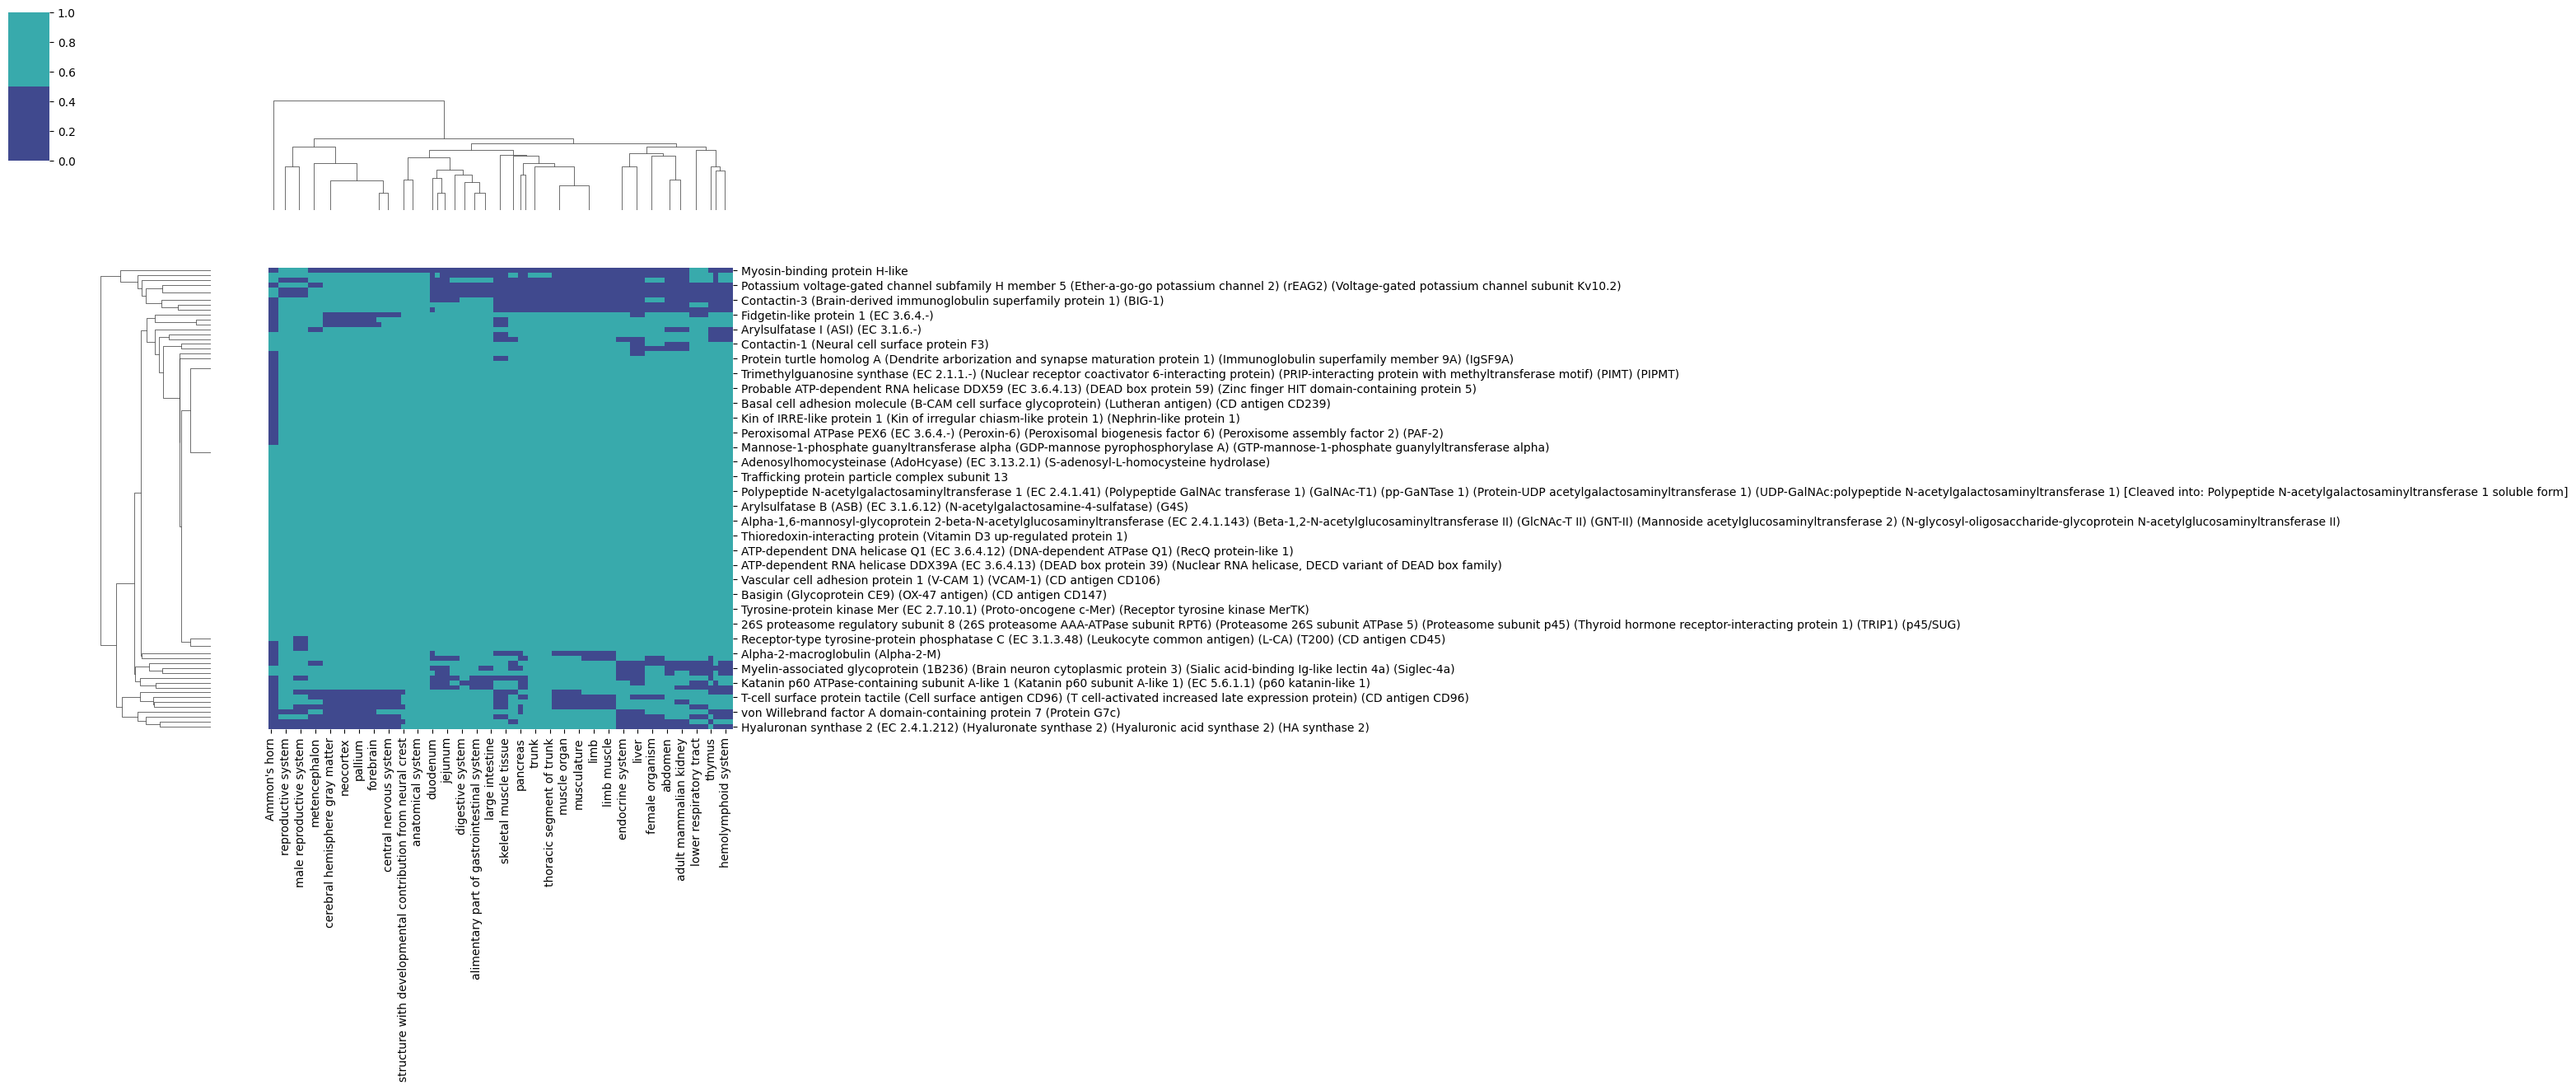

Pan troglodytes (Chimpanzee)
Index(['anat', 'anatName', 'geneEns', 'Entry Name', 'Entry', 'Gene Names',
       'Protein names', 'Reviewed', 'Protein names.1', 'Organism',
       'Taxonomic lineage (Ids)', 'Sequence', 'Bgee', 'Gene Ontology (GO)',
       'Ensembl', 'query', 'fam'],
      dtype='object')


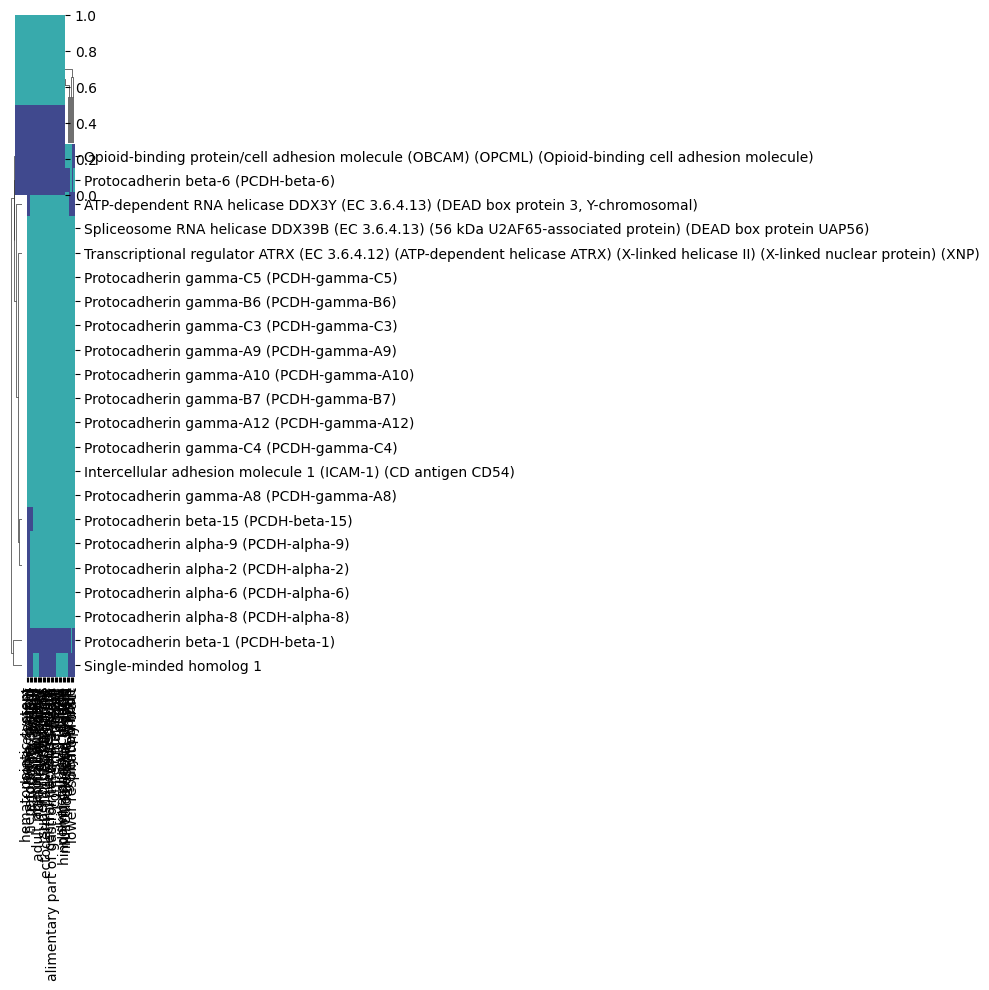

Bos taurus (Bovine)
Index(['anat', 'anatName', 'geneEns', 'Entry Name', 'Entry', 'Gene Names',
       'Protein names', 'Reviewed', 'Protein names.1', 'Organism',
       'Taxonomic lineage (Ids)', 'Sequence', 'Bgee', 'Gene Ontology (GO)',
       'Ensembl', 'query', 'fam'],
      dtype='object')


/home/cactuskid/miniconda3/envs/ML2/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/cactuskid/miniconda3/envs/ML2/lib/python3.10/site-packages/seaborn/matrix.py:1113: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(**tight_params)


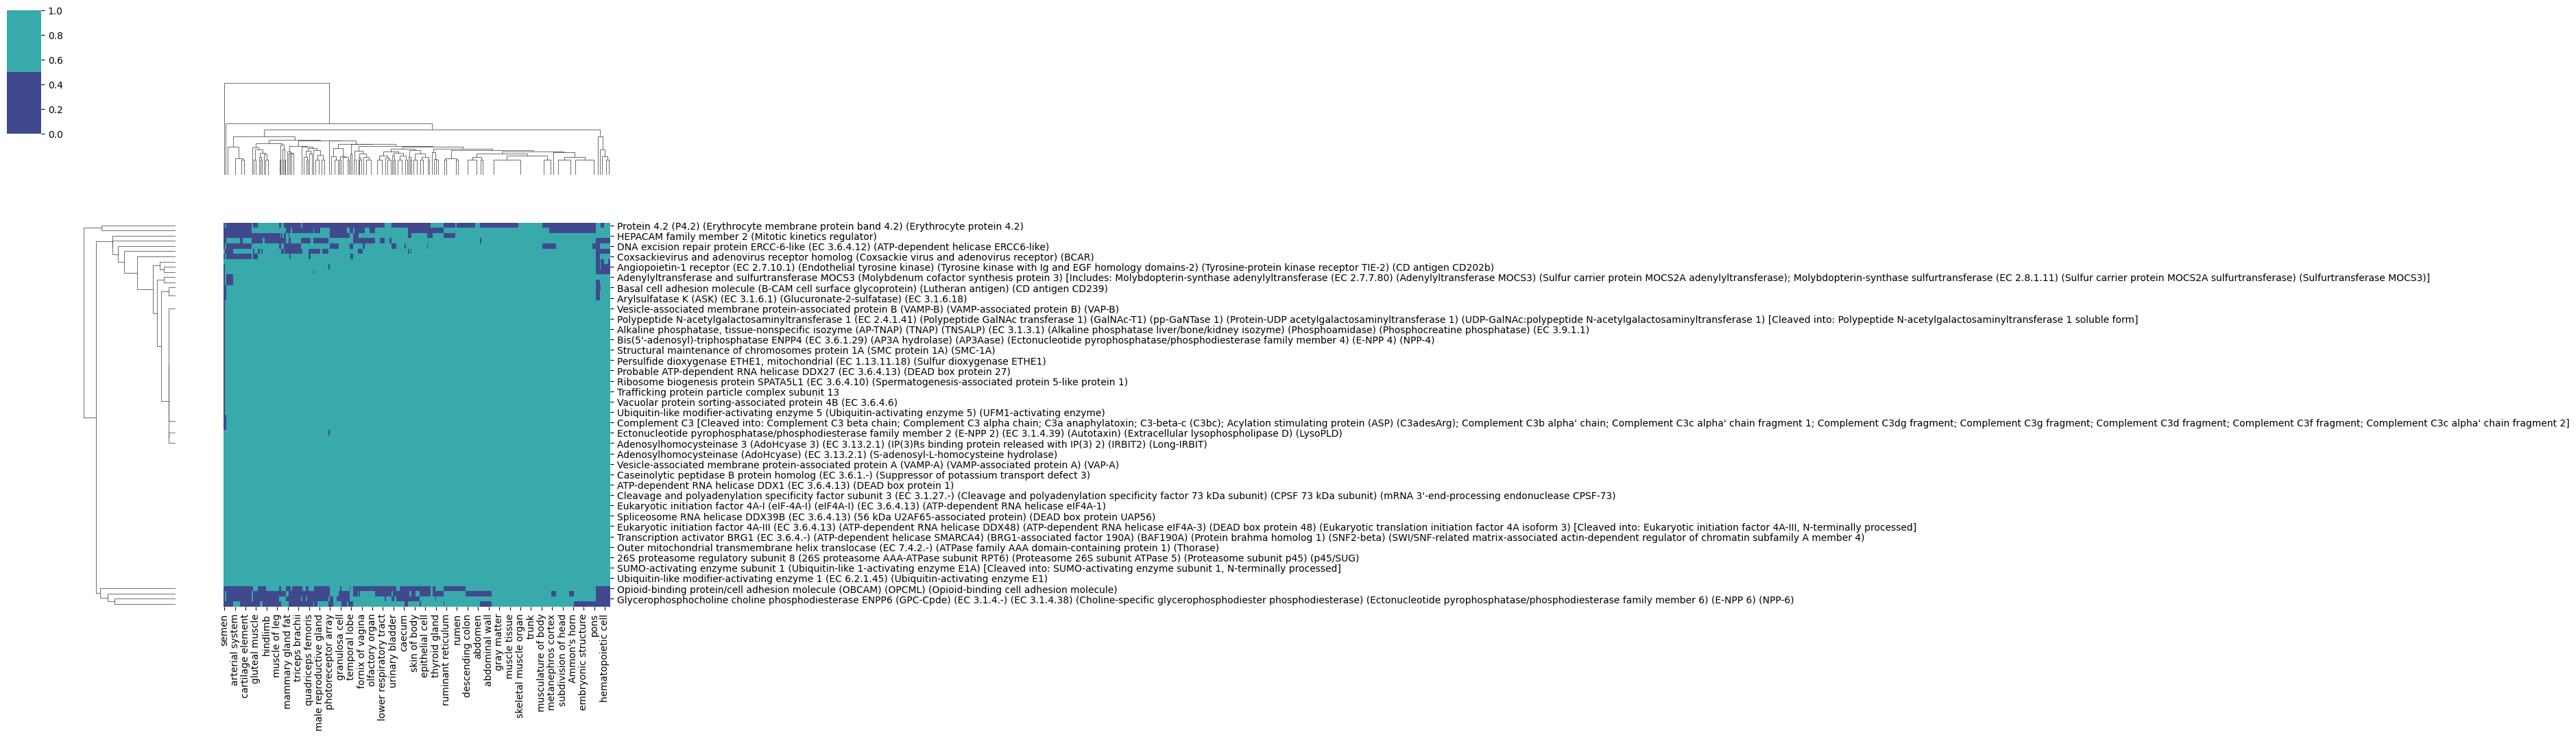

Gallus gallus (Chicken)
Index(['anat', 'anatName', 'geneEns', 'Entry Name', 'Entry', 'Gene Names',
       'Protein names', 'Reviewed', 'Protein names.1', 'Organism',
       'Taxonomic lineage (Ids)', 'Sequence', 'Bgee', 'Gene Ontology (GO)',
       'Ensembl', 'query', 'fam'],
      dtype='object')


/home/cactuskid/miniconda3/envs/ML2/lib/python3.10/site-packages/seaborn/matrix.py:1113: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(**tight_params)


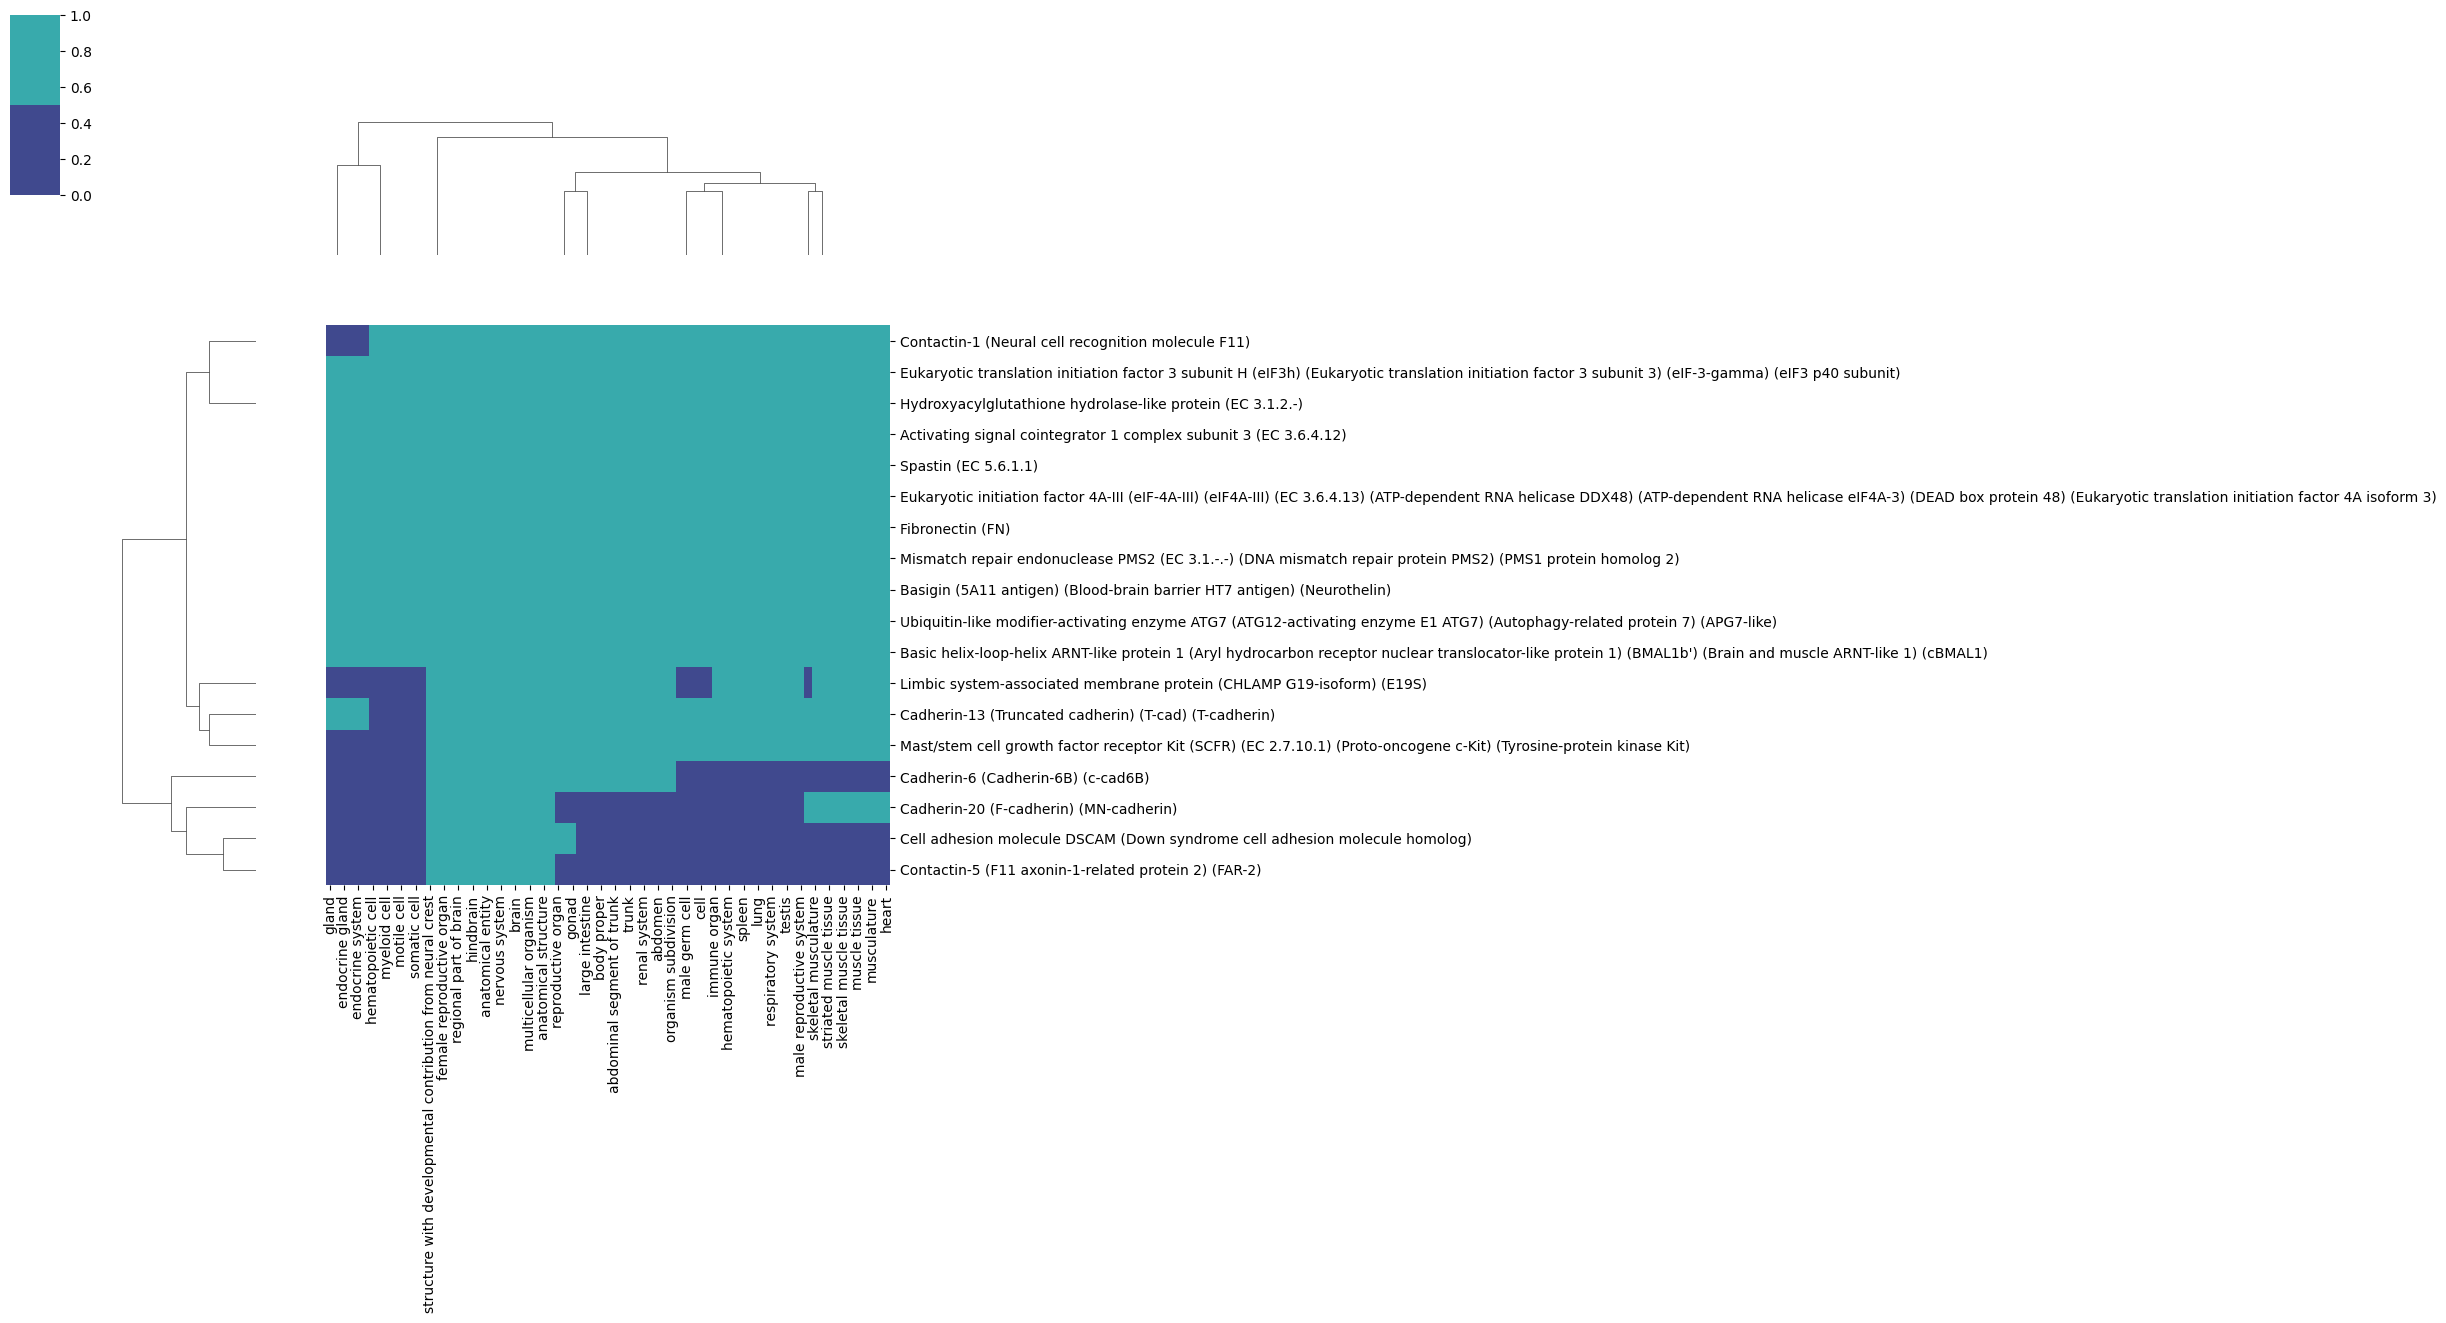

Felis catus (Cat) (Felis silvestris catus)
Index(['anat', 'anatName', 'geneEns', 'Entry Name', 'Entry', 'Gene Names',
       'Protein names', 'Reviewed', 'Protein names.1', 'Organism',
       'Taxonomic lineage (Ids)', 'Sequence', 'Bgee', 'Gene Ontology (GO)',
       'Ensembl', 'query', 'fam'],
      dtype='object')
Equus caballus (Horse)
Index(['anat', 'anatName', 'geneEns', 'Entry Name', 'Entry', 'Gene Names',
       'Protein names', 'Reviewed', 'Protein names.1', 'Organism',
       'Taxonomic lineage (Ids)', 'Sequence', 'Bgee', 'Gene Ontology (GO)',
       'Ensembl', 'query', 'fam'],
      dtype='object')


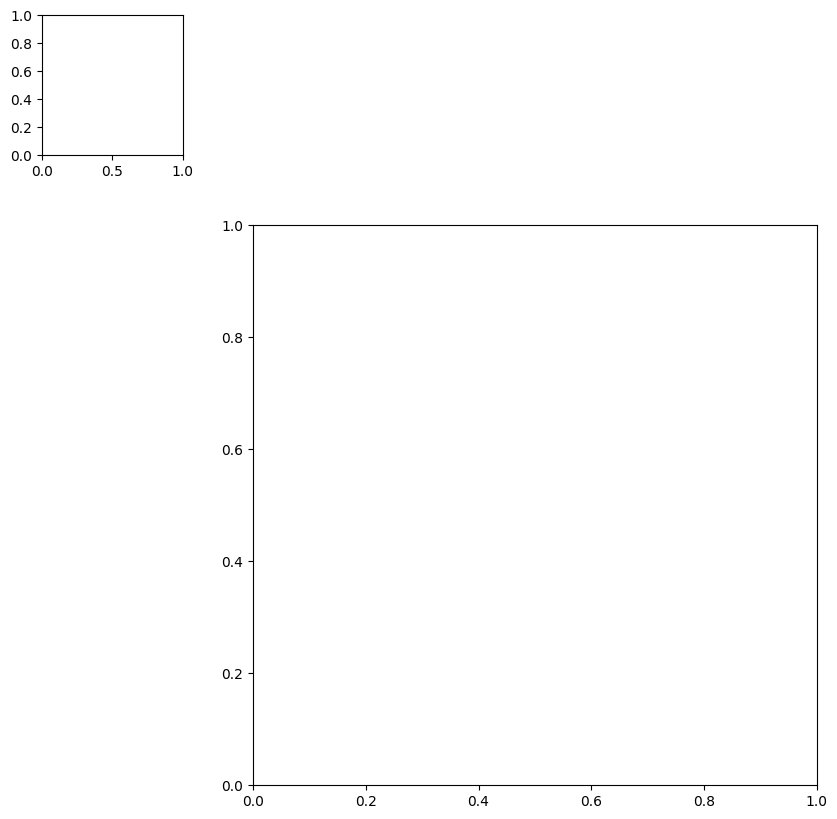

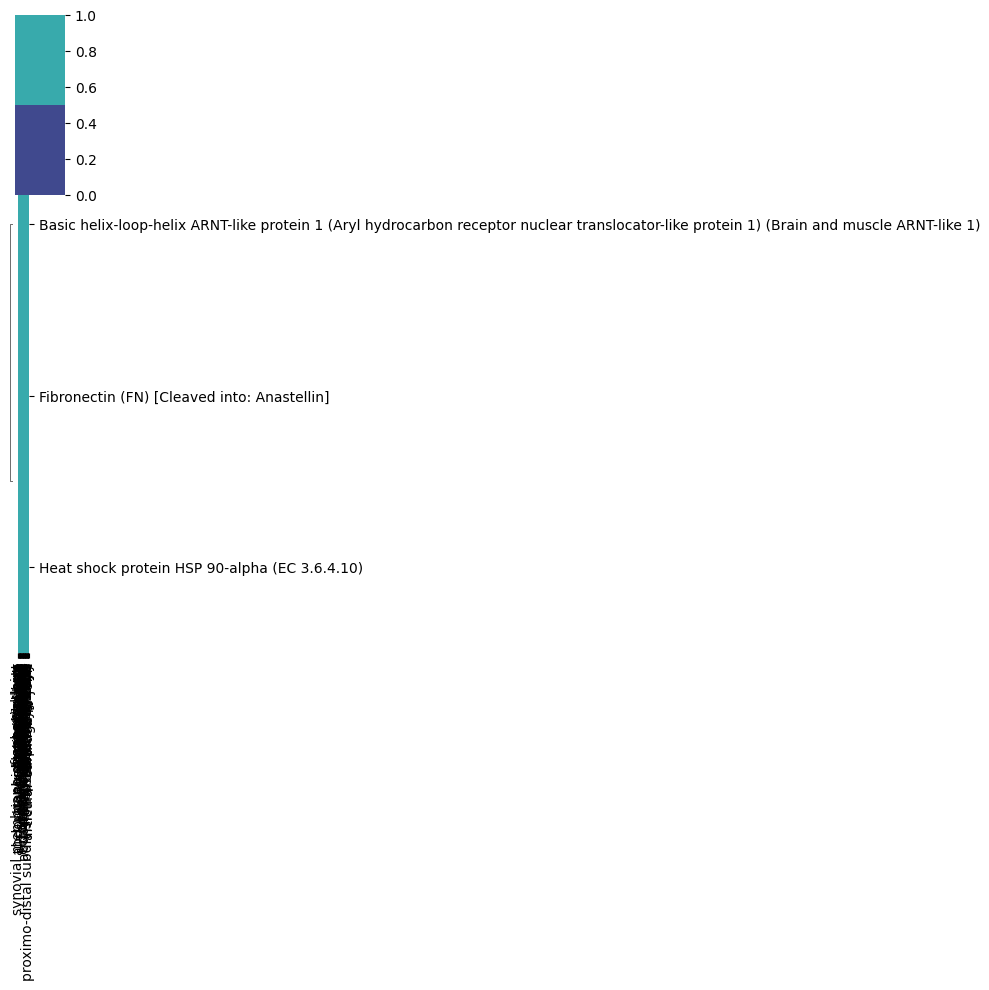

Sus scrofa (Pig)
Index(['anat', 'anatName', 'geneEns', 'Entry Name', 'Entry', 'Gene Names',
       'Protein names', 'Reviewed', 'Protein names.1', 'Organism',
       'Taxonomic lineage (Ids)', 'Sequence', 'Bgee', 'Gene Ontology (GO)',
       'Ensembl', 'query', 'fam'],
      dtype='object')


/home/cactuskid/miniconda3/envs/ML2/lib/python3.10/site-packages/seaborn/matrix.py:1113: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(**tight_params)


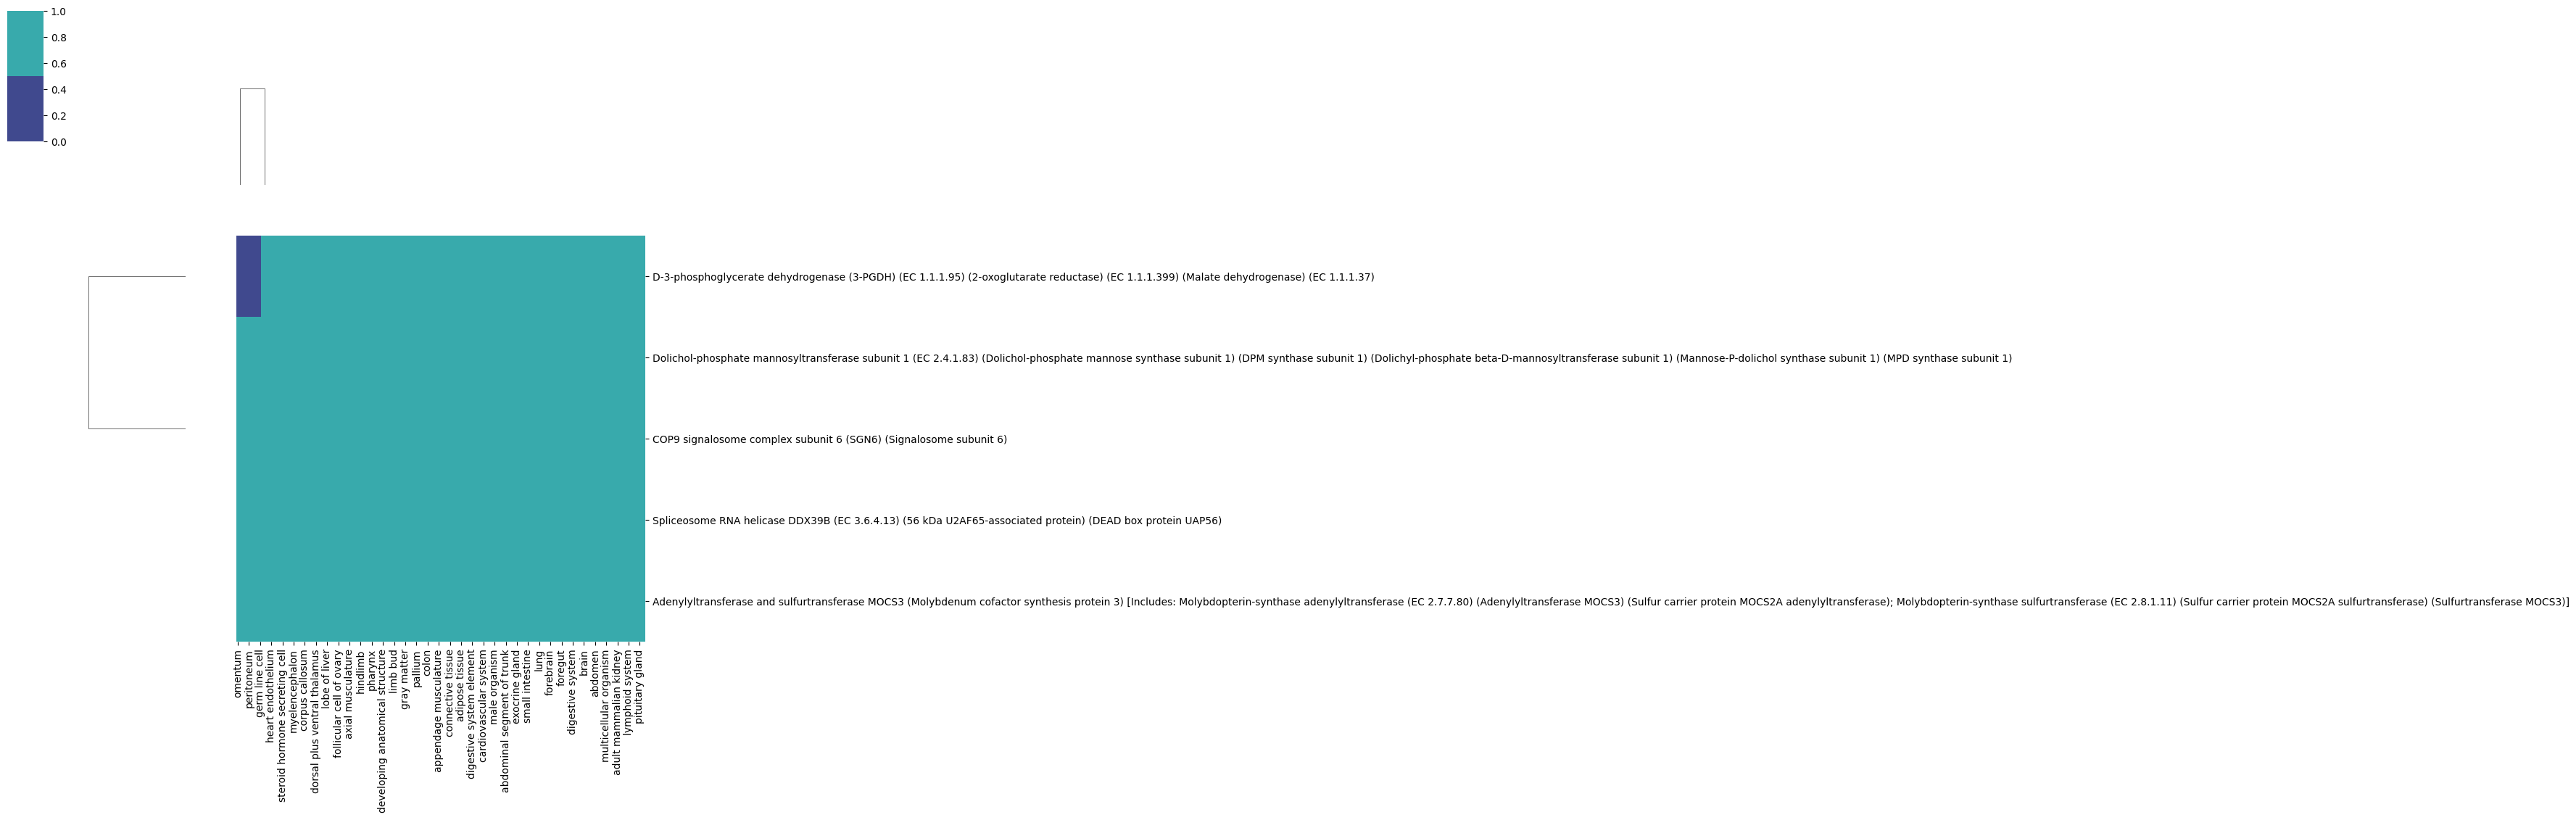

Macaca fascicularis (Crab-eating macaque) (Cynomolgus monkey)
Index(['anat', 'anatName', 'geneEns', 'Entry Name', 'Entry', 'Gene Names',
       'Protein names', 'Reviewed', 'Protein names.1', 'Organism',
       'Taxonomic lineage (Ids)', 'Sequence', 'Bgee', 'Gene Ontology (GO)',
       'Ensembl', 'query', 'fam'],
      dtype='object')


/home/cactuskid/miniconda3/envs/ML2/lib/python3.10/site-packages/seaborn/matrix.py:615: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(0, max_dependent_coord * 1.05)
/home/cactuskid/miniconda3/envs/ML2/lib/python3.10/site-packages/seaborn/matrix.py:623: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0, max_dependent_coord * 1.05)
/home/cactuskid/miniconda3/envs/ML2/lib/python3.10/site-packages/seaborn/matrix.py:1113: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(**tight_params)


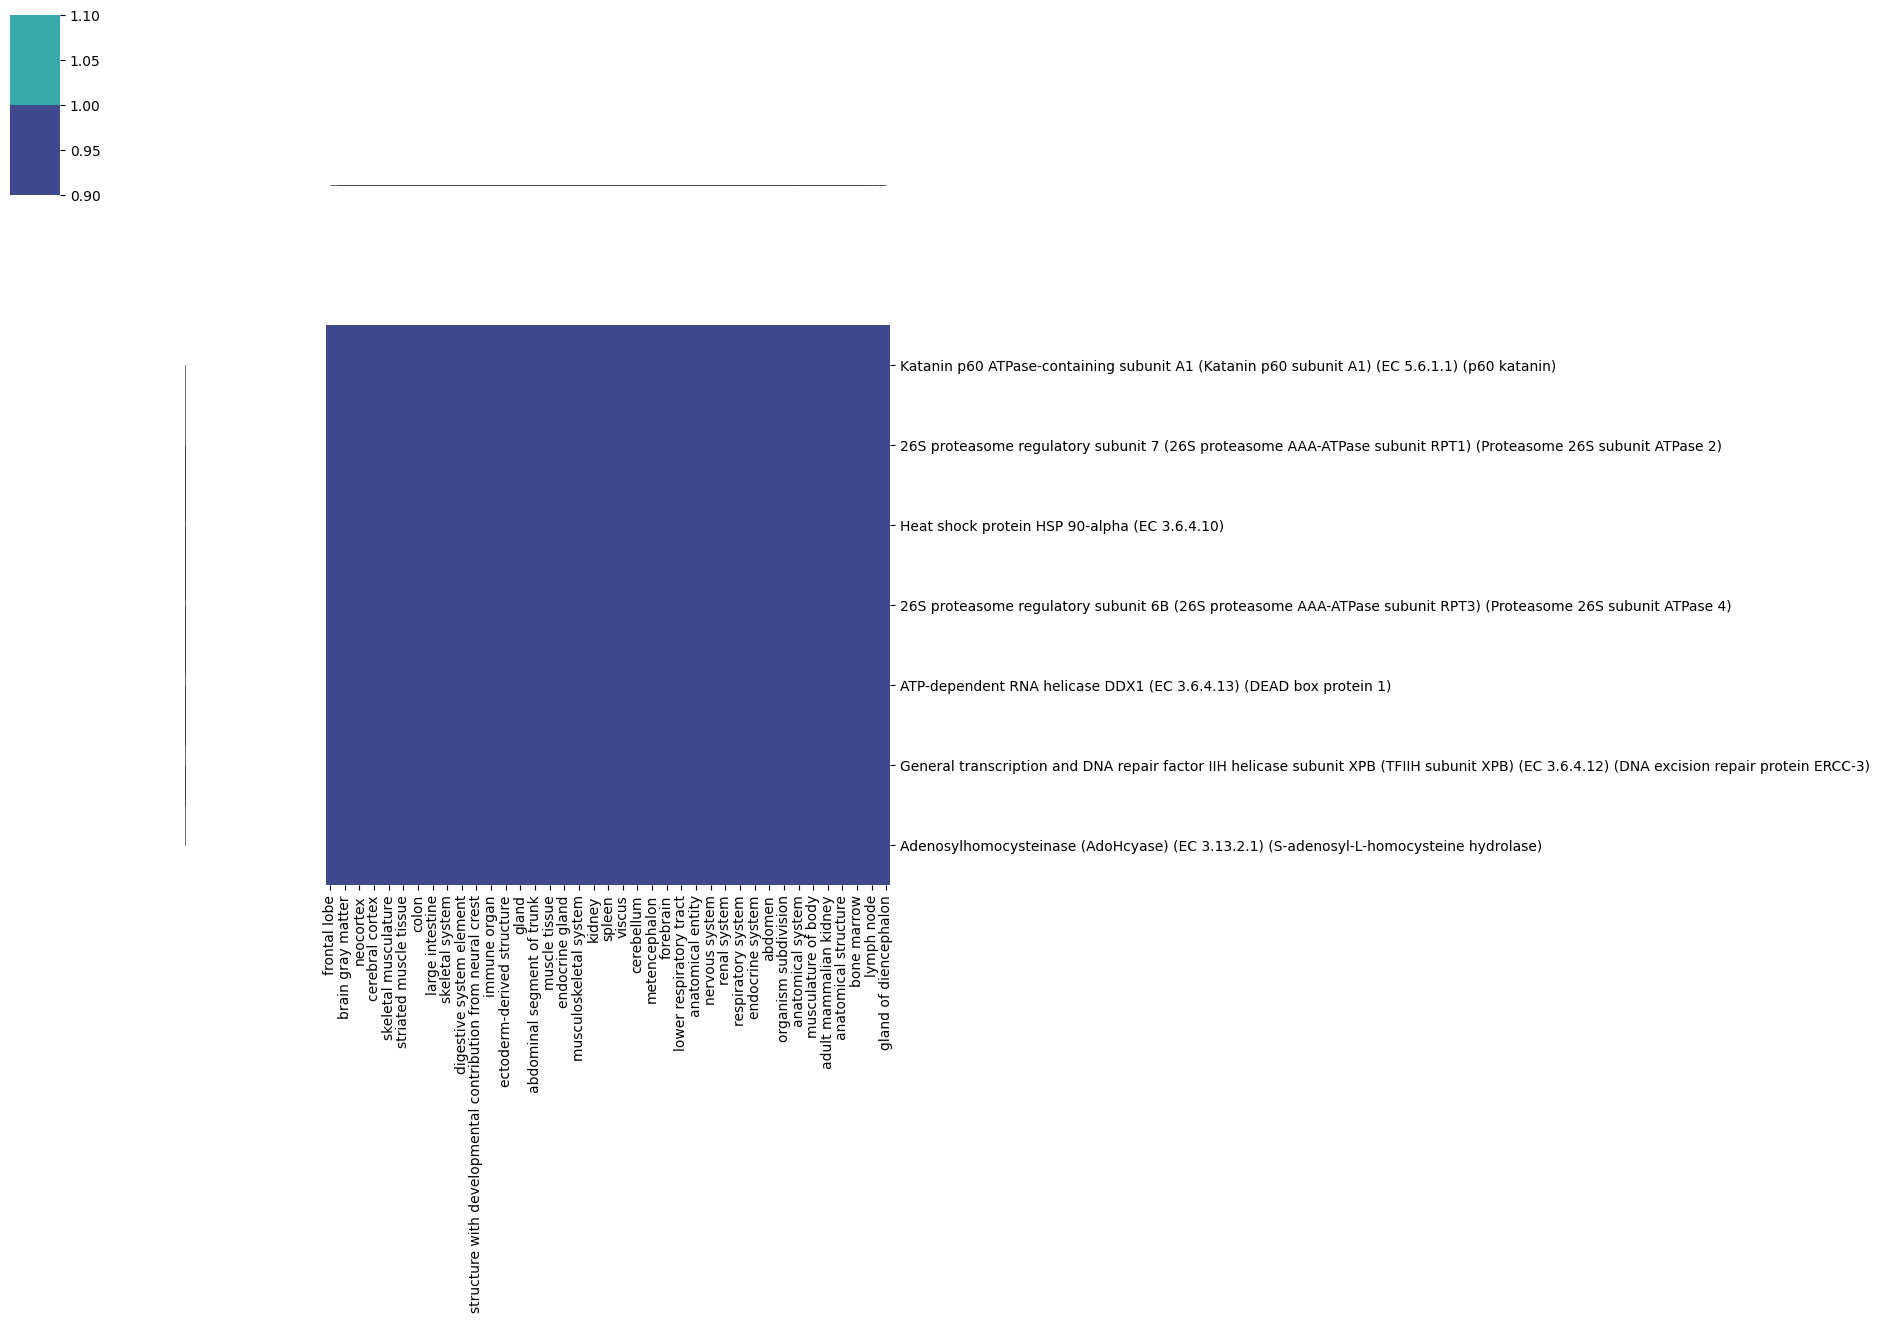

Gorilla gorilla gorilla (Western lowland gorilla)
Index(['anat', 'anatName', 'geneEns', 'Entry Name', 'Entry', 'Gene Names',
       'Protein names', 'Reviewed', 'Protein names.1', 'Organism',
       'Taxonomic lineage (Ids)', 'Sequence', 'Bgee', 'Gene Ontology (GO)',
       'Ensembl', 'query', 'fam'],
      dtype='object')


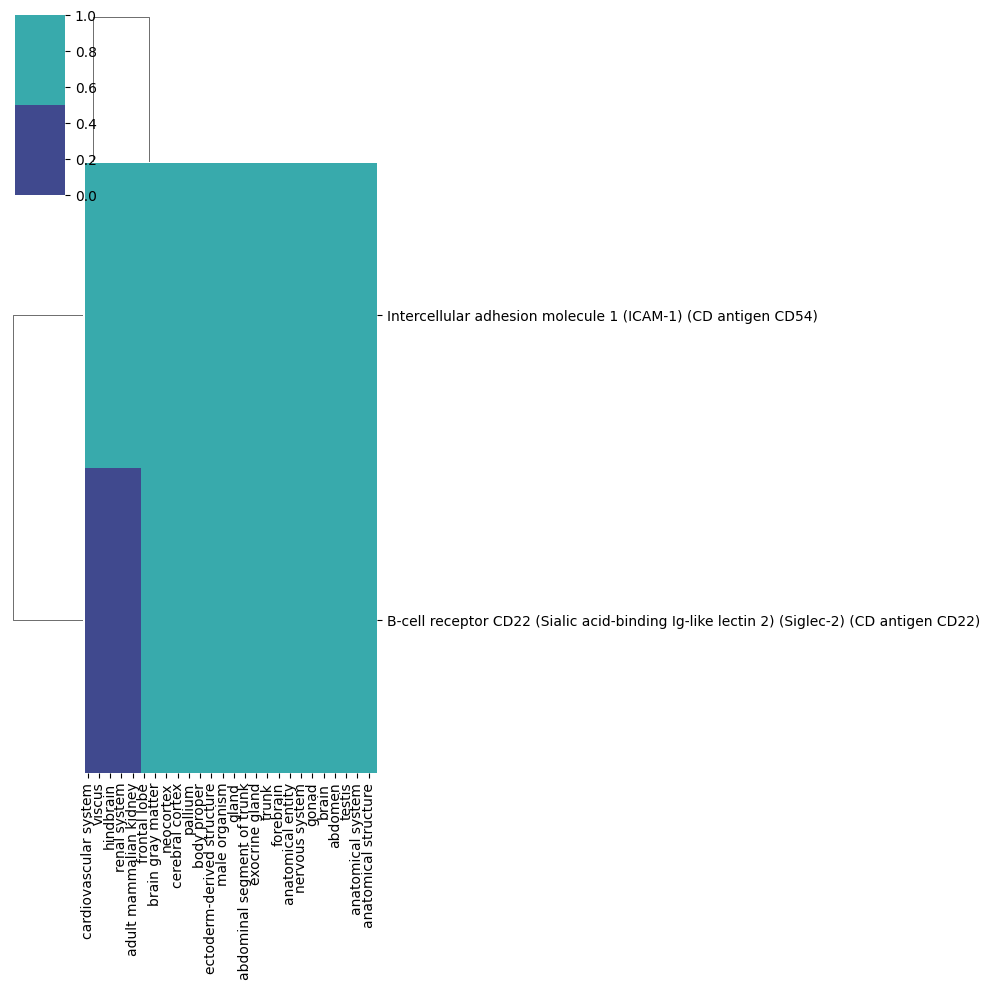

Macaca mulatta (Rhesus macaque)
Index(['anat', 'anatName', 'geneEns', 'Entry Name', 'Entry', 'Gene Names',
       'Protein names', 'Reviewed', 'Protein names.1', 'Organism',
       'Taxonomic lineage (Ids)', 'Sequence', 'Bgee', 'Gene Ontology (GO)',
       'Ensembl', 'query', 'fam'],
      dtype='object')


/home/cactuskid/miniconda3/envs/ML2/lib/python3.10/site-packages/seaborn/matrix.py:615: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(0, max_dependent_coord * 1.05)
/home/cactuskid/miniconda3/envs/ML2/lib/python3.10/site-packages/seaborn/matrix.py:623: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0, max_dependent_coord * 1.05)


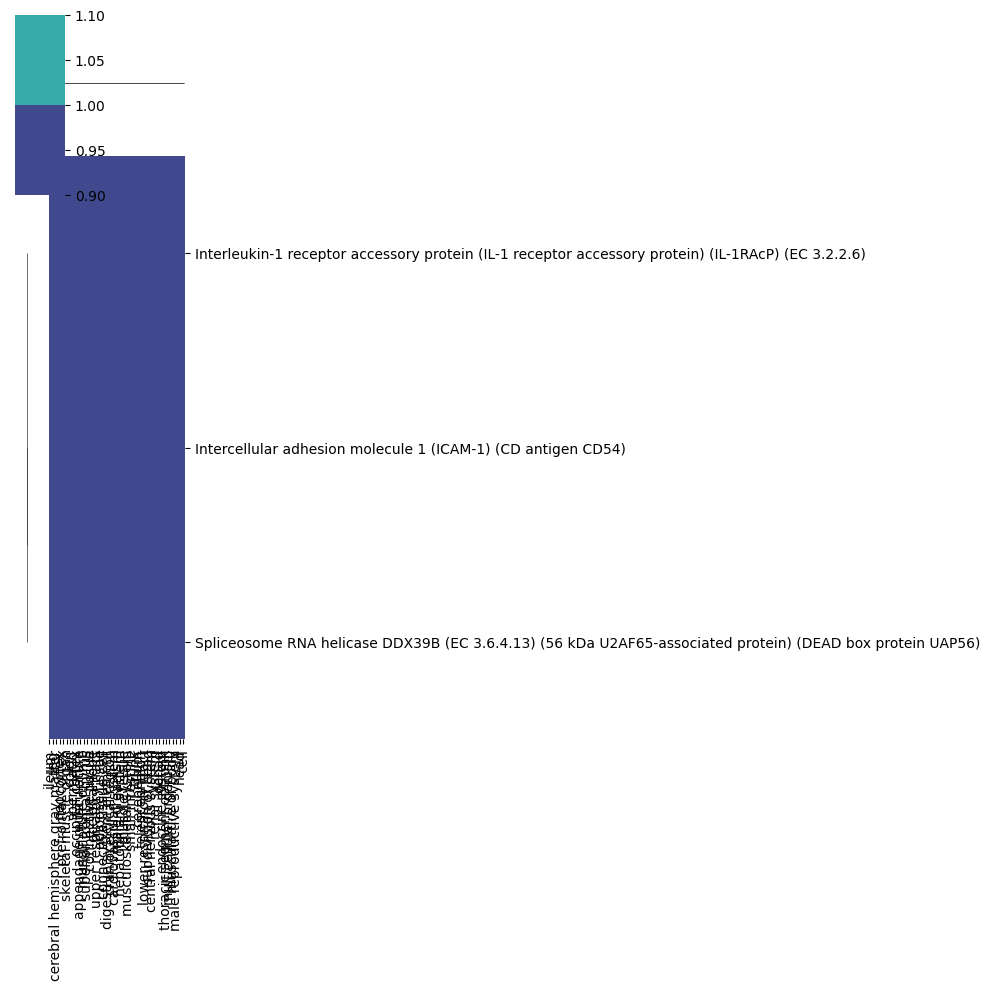

Pan paniscus (Pygmy chimpanzee) (Bonobo)
Index(['anat', 'anatName', 'geneEns', 'Entry Name', 'Entry', 'Gene Names',
       'Protein names', 'Reviewed', 'Protein names.1', 'Organism',
       'Taxonomic lineage (Ids)', 'Sequence', 'Bgee', 'Gene Ontology (GO)',
       'Ensembl', 'query', 'fam'],
      dtype='object')


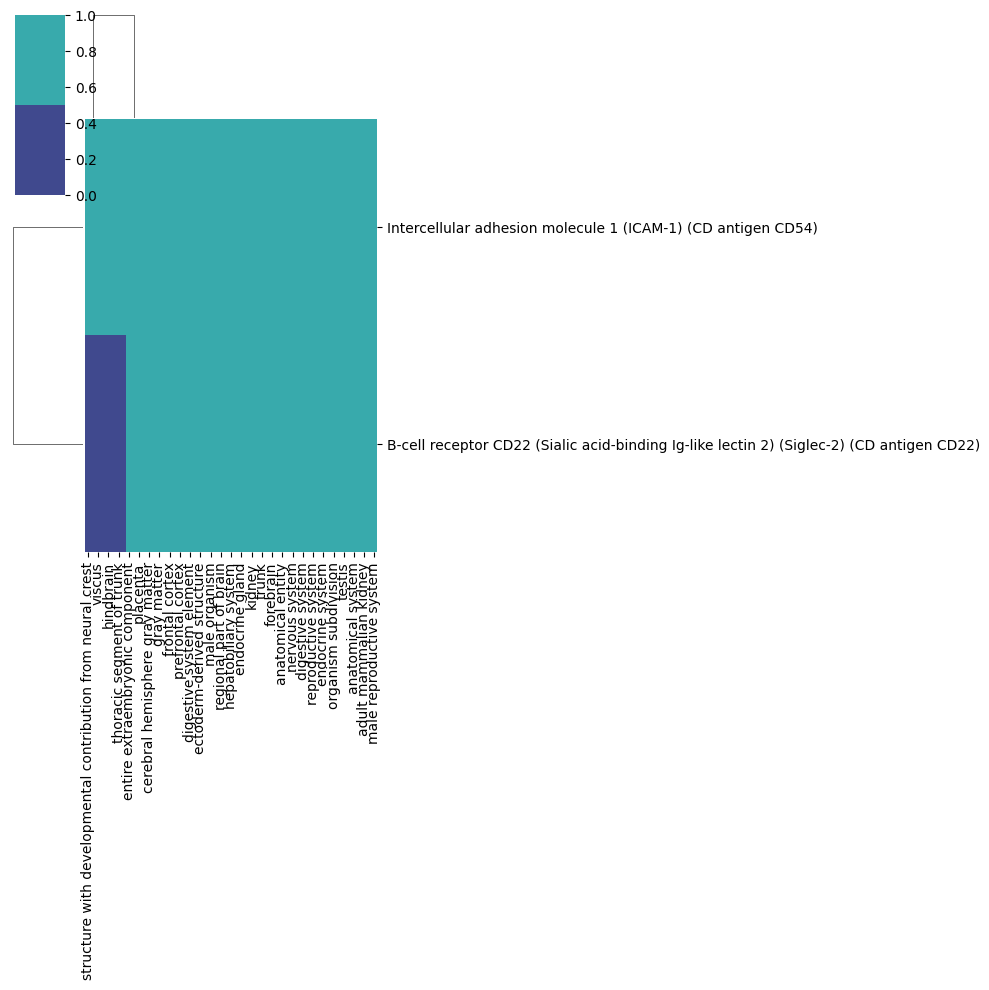

Canis lupus familiaris (Dog) (Canis familiaris)
Index(['anat', 'anatName', 'geneEns', 'Entry Name', 'Entry', 'Gene Names',
       'Protein names', 'Reviewed', 'Protein names.1', 'Organism',
       'Taxonomic lineage (Ids)', 'Sequence', 'Bgee', 'Gene Ontology (GO)',
       'Ensembl', 'query', 'fam'],
      dtype='object')


/home/cactuskid/miniconda3/envs/ML2/lib/python3.10/site-packages/seaborn/matrix.py:1113: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(**tight_params)


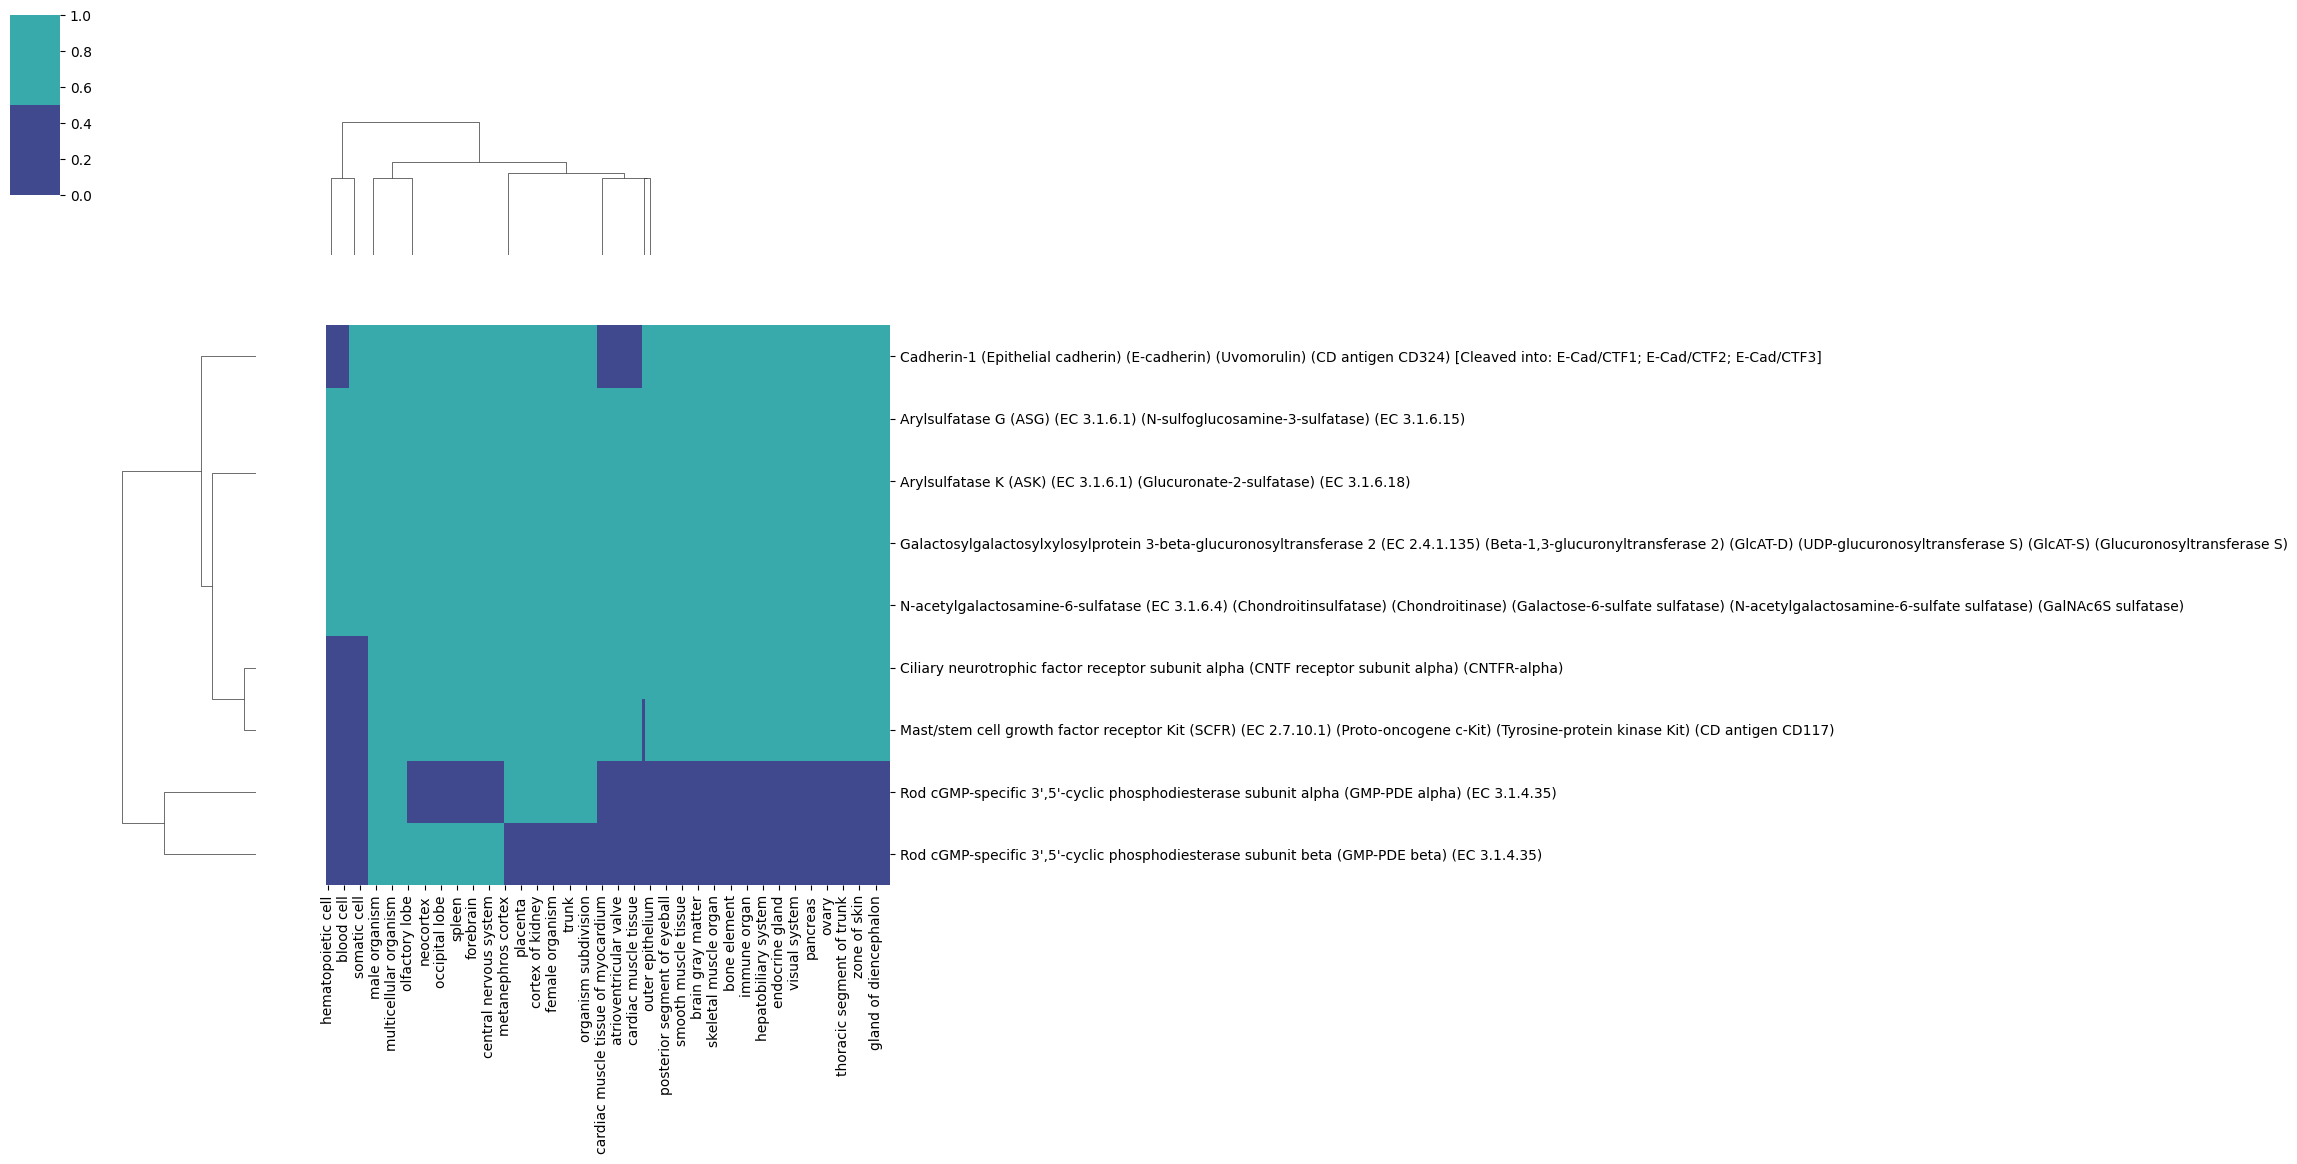

Cavia porcellus (Guinea pig)
Index(['anat', 'anatName', 'geneEns', 'Entry Name', 'Entry', 'Gene Names',
       'Protein names', 'Reviewed', 'Protein names.1', 'Organism',
       'Taxonomic lineage (Ids)', 'Sequence', 'Bgee', 'Gene Ontology (GO)',
       'Ensembl', 'query', 'fam'],
      dtype='object')


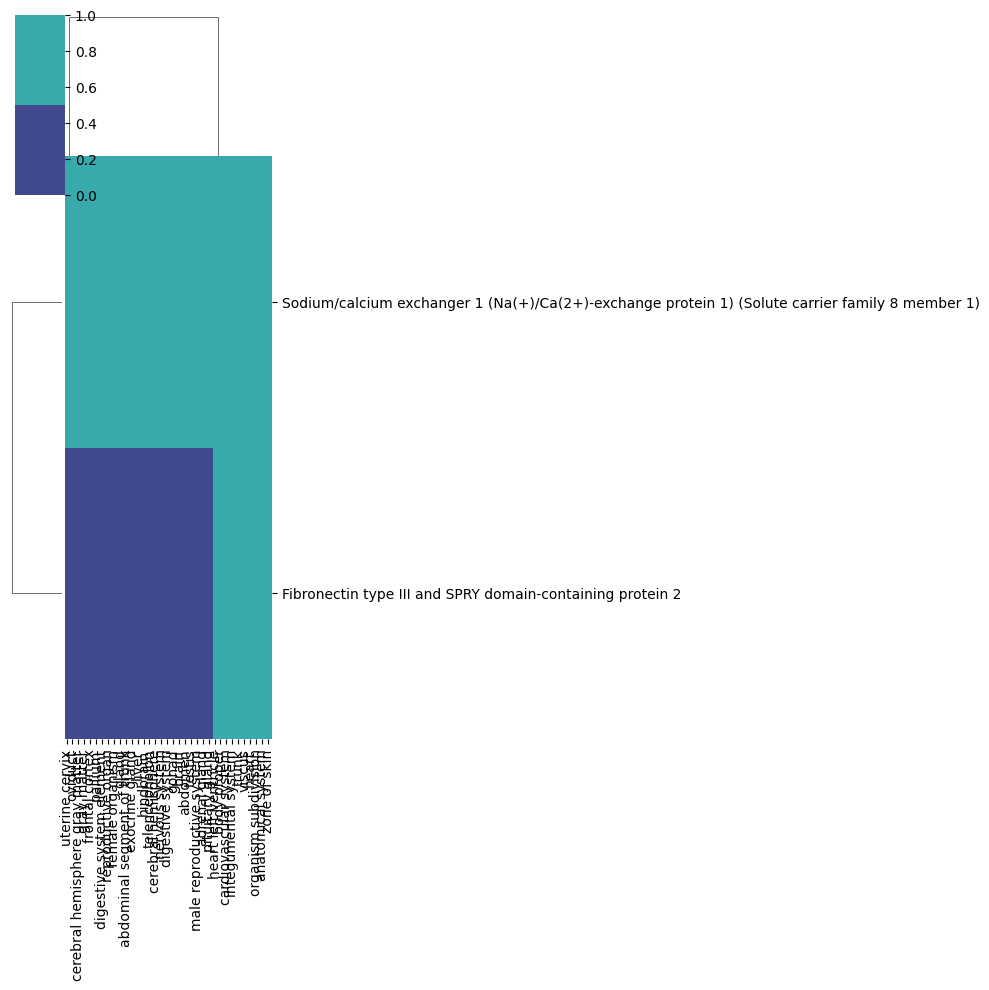

In [40]:

#now we have a dataframe with all of our uniprot entries and their bgee IDs
#we can use this to query bgee for the tissue specific expression of each of our genes



for species in alldf.Organism.unique():
    print(species)

    sub = alldf[alldf.Organism == species]
    chunks = [ Bgee_query(c) for c in chunk(sub.Bgee.unique(), 20) ]
    bgeedf = pd.concat( chunks )
    bgeedf.to_csv('../examples/fsx1/'+species+'bgee_tissue.csv')
    
    #merge with sub
    bgeedf = bgeedf.merge(sub,  left_on='geneEns', right_on='Bgee')
    #make a matrix of the expression data
    print(bgeedf.columns)

    rows = list(bgeedf['Protein names'].unique())
    columns = list(bgeedf.anatName.unique())

    expr_mat = {r :{ c : 0 for c in columns  } for r in rows }
    
    for i,r in bgeedf.iterrows():
        expr_mat[r['Protein names']][r.anatName] = 1
    try:
        expr_mat = pd.DataFrame.from_dict( expr_mat , orient='index' )
        g = sns.clustermap( expr_mat  , col_cluster=True, row_cluster= True , cmap = sns.color_palette("mako", 2))

        plt.show()
    except:
        pass


In [122]:
import goatools
from goatools.obo_parser import GODag
from goatools.associations import read_ncbi_gene2go
from goatools.base import download_ncbi_associations
from goatools.goea.go_enrichment import GOEnrichmentStudy

Note: you may need to restart the kernel to use updated packages.


In [50]:
#get go terms for each cluster
from collections import Counter
for species in alldf.Organism.unique():
    terms = []
    print(species)
    sub = alldf[alldf.Organism == species]
    #count the occurences of each go term
    sub = sub.dropna(subset=['Gene Ontology (GO)'])
    for idx,r in sub.iterrows():
        terms+=r['Gene Ontology (GO)'].split(';')
    #use a counter on the list
    c = Counter(terms)
    #print an ordered list of the most common terms
    print(c.most_common(10))
    #output a file with the counts for each term on a line
    with open( '../examples/fsx1/'+species+'go_tissue.txt' , 'w' ) as gout:
        for k,v in c.items():
            if v> 10:
                gout.write(k.split('[')[1].replace(']','')+' '+str(v)+'\n')



Oryctolagus cuniculus (Rabbit)
[(' plasma membrane [GO:0005886]', 2), ('extracellular region [GO:0005576]', 2), (' DNA binding [GO:0003677]', 2), (' heparin binding [GO:0008201]', 2), (' acute-phase response [GO:0006953]', 2), (' cell adhesion [GO:0007155]', 2), (' regulation of cell shape [GO:0008360]', 2), (' cytoplasm [GO:0005737]', 2), (' ATP binding [GO:0005524]', 2), (' ATP hydrolysis activity [GO:0016887]', 2)]
Homo sapiens (Human)
[(' plasma membrane [GO:0005886]', 298), (' ATP binding [GO:0005524]', 180), (' cell adhesion [GO:0007155]', 158), (' membrane [GO:0016020]', 154), (' nucleus [GO:0005634]', 145), (' homophilic cell adhesion via plasma membrane adhesion molecules [GO:0007156]', 138), (' nucleoplasm [GO:0005654]', 136), (' ATP hydrolysis activity [GO:0016887]', 131), (' calcium ion binding [GO:0005509]', 120), (' metal ion binding [GO:0046872]', 110)]
Mus musculus (Mouse)
[(' plasma membrane [GO:0005886]', 210), (' ATP binding [GO:0005524]', 162), (' nucleus [GO:000563

In [ ]:
#get the esm atlas pdb file

def grab_esm_model(mgnifyid):
    url = 'https://api.esmatlas.com/fetchPredictedStructure/'+mgnifyid+'.pdb'
    data = requests.get(url).text
    return data


In [26]:
esmdf = '../../fsx1_evo/esm_atlas/result_fsx1vsESM.m8'
esmdf = pd.read_table(esmdf, header=None)
esmdf.columns = ['qseqid', 'sseqid', 'pident', 'length', 'mismatch', 'gapopen', 'qstart', 'qend', 'sstart', 'send', 'evalue', 'bitscore']
esmdf['mgnifyid'] = esmdf.sseqid.map(lambda x : x.split('.')[0])
esmdf['qmatch'] = esmdf.qend - esmdf.qstart
esmdf = esmdf[esmdf.qmatch > 300]
esmdf = esmdf[esmdf.bitscore  > 60]
esmdf = esmdf[esmdf.evalue  < .00001]
esmdf.sort_values('pident', ascending=False, inplace=True)
print(esmdf)

                                                   qseqid  \
22083                       MGYP000692789748_ranked_0.pdb   
69687                 WP_207587115_Halovivax_ranked_0.pdb   
128874  W3300014208-Ga0172379-10000243-871512-158_rank...   
124260  AntAceMinimDraft_18_1070375.scaffolds.fasta_sc...   
36820   W3300014208-Ga0172379-10001592-871560-40_ranke...   
...                                                   ...   
74718   AntAceMinimDraft_18_1070375.scaffolds.fasta_sc...   
65009   AntAceMinimDraft_4_1070372.scaffolds.fasta_sca...   
114610                         PHYT.Excavata.CCW68827.pdb   
135820              RLI53188.1-Thorarchaeota_ranked_0.pdb   
135777              RLI53188.1-Thorarchaeota_ranked_0.pdb   

                         sseqid  pident  length  mismatch  gapopen  qstart  \
22083   MGYP001262310607.pdb.gz   0.137     471       343        0      13   
69687   MGYP000465139856.pdb.gz   0.135     470       349        0      21   
128874  MGYP001588790309.pdb.gz  